# Team Members

* Jacqueline Chiu (1221423125)
* Harul Murugan Ramamoorthy Soppana(1234159292)
* Koushika Ravikumar (1234350366)
* Pranay Shah ( 1209851107 )

# **Machine Learning in Business: Bird Strike Analysis and Prediction**

## **Project Overview**
Bird strikes pose a significant safety and financial challenge to the aviation industry. Understanding historical bird strike data can help predict incidents, assess their severity, and identify key contributing factors. This project leverages machine learning techniques to analyze bird strike data and provide actionable insights to aviation stakeholders.

## **Problem Definition**
Bird strikes have the potential to cause severe damage to aircraft, disrupt flight schedules, and result in significant financial losses. With historical bird strike data, we aim to answer the following key questions:
1. **When and where are bird strikes most likely to occur?**
2. **What factors contribute to the severity of these incidents?**
3. **What financial impact do bird strikes have, and how can it be mitigated?**
4. **How can we categorize and group bird strikes to identify patterns and trends?**

By addressing these questions, we aim to enhance aviation safety, reduce costs, and propose data-driven strategies for mitigation.

---

## **Use Cases**
The project focuses on the following use cases:

### **1. Predictive Analysis**
- **Goal**: Predict the likelihood of bird strike incidents, the occurrence of damage, and the severity of accidents.
- **Importance**: Helps airlines and airports anticipate high-risk situations and allocate resources effectively.
- **Outcome**: A model to predict incident likelihood and severity, providing proactive insights.

### **2. Cost Analysis**
- **Goal**: Analyze the financial impact of bird strikes and identify factors that escalate costs.
- **Importance**: Guides decision-making for cost-effective safety measures.
- **Outcome**: Insights into cost drivers and strategies for minimizing financial losses.

 ---

## **Why Are We Doing This?**
The aviation industry invests heavily in safety and risk management. This project provides:
1. **Improved Safety**: By identifying high-risk scenarios and mitigation strategies.
2. **Cost Savings**: By understanding financial drivers and optimizing preventive measures.
3. **Data-Driven Insights**: By leveraging historical data to make informed decisions.
4. **Practical Applications**: Demonstrates how machine learning can be applied to real-world business problems.

---

# **Data Preprocessing and Exploratory Data Analysis (EDA)**

## **Overview**
This step focuses on understanding the dataset, identifying missing values, handling inconsistencies, and exploring key trends. It includes:
1. **Dataset Overview**: Understanding the structure, columns, and data types.
2. **Missing Values Analysis**: Identifying and quantifying missing or null values.
3. **Basic Descriptive Statistics**: Understanding data distributions.
4. **Visual Exploration**: Highlighting key patterns and relationships.

---

## **Step 1: Dataset Overview**

### **Purpose**
This step aims to understand the structure and contents of the dataset. By examining the dataset overview, we can:
- Identify the number of rows (data points) and columns (features).
- Understand the data types of each column (e.g., numerical, categorical, date).
- Get a quick glimpse of the data to spot any immediate anomalies.

### **What We Do**
1. Use `DataFrame.info()` to:
   - Display column names.
   - Show data types (e.g., float, int, object).
   - Identify the number of non-null entries in each column.
2. Use `DataFrame.head()` to preview the first 5 rows, giving a sense of how the data is structured.

### **Why This Matters**
- Helps to quickly understand the dataset's composition.
- Identifies columns that need cleaning or transformation (e.g., missing values or incorrect data types).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, roc_auc_score, precision_recall_curve
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Loading**

In [ ]:
# Loading the Dataset
data = pd.read_csv('/content/drive/My Drive/Bird_strikes.csv')
data.head(10)

,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
0,202152,Airplane,LAGUARDIA NY,"(1000, 2000]",B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,"(30, 50]",C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,"(30, 50]",B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,"(30, 50]",CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
5,218432,Airplane,GUAYAQUIL/S BOLIVAR,"(-1, 0]",A-300,Over 100,537,NaN,7/24/03 0:00,No damage,...,False,NO DMG. BIRD REMAINS ON F/O WINDSCREEN.,Small,No Cloud,Unknown bird - small,N,0,0,0,No
6,221697,Airplane,NEW CASTLE COUNTY,"(100, 200]",LEARJET-25,Over 100,227,Other,8/17/03 0:00,Caused damage,...,True,NaN,Small,No Cloud,European starling,N,"1,481,711",150,0,No
7,236635,Airplane,WASHINGTON DULLES INTL ARPT,"(50, 100]",A-320,Over 100,320,Other,3/1/06 0:00,Caused damage,...,False,WS ASSISTED IN CLEAN-UP OF 273 STARLINGS AND 1...,Small,Some Cloud,European starling,Y,"1,483,141",100,0,No
8,207369,Airplane,ATLANTA INTL,"(-1, 0]",DC-9-30,2 to 10,9,Aborted Take-off,1/6/00 0:00,No damage,...,False,NaN,Small,Some Cloud,Rock pigeon,N,0,0,0,No
9,204371,Airplane,ORLANDO SANFORD INTL AIRPORT,"(-1, 0]",A-330,2 to 10,4,NaN,1/7/00 0:00,No damage,...,False,FLT 057,Small,Some Cloud,Unknown bird - small,N,0,0,0,No


In [ ]:
print("Row and Column count: ", data.shape)

Row and Column count:  (25429, 26)


In [ ]:
# Descriptive statistics
print(data.describe())

            RecordID  NumberStruckActual      Altitude  PeopleInjured
count   25429.000000        25429.000000  25429.000000   25429.000000
mean   253800.148767            2.699634    799.028432       0.000826
std     38472.800499           12.825804   1740.079843       0.047339
min      1195.000000            1.000000      0.000000       0.000000
25%    225742.000000            1.000000      0.000000       0.000000
50%    248609.000000            1.000000     50.000000       0.000000
75%    269044.000000            1.000000    700.000000       0.000000
max    321909.000000          942.000000  18000.000000       6.000000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

## **Step 2: Encoding Categorical Columns**

### **Purpose**
Many machine learning models require numerical input. Encoding categorical columns transforms them into a format that models can process effectively. This step ensures that all categorical features in our dataset are converted to numerical representations.

---

### **Why Encoding is Necessary?**
1. **Machine Learning Compatibility**:
   - Algorithms cannot process non-numerical (categorical) data directly.
   - Encoding allows us to convert categories into numerical representations.

2. **Ensures Model Performance**:
   - By using appropriate encoding strategies, we avoid introducing biases.
   - Helps models interpret categorical data correctly (e.g., ordinal vs. nominal).

---

### **Types of Encoding**
1. **Label Encoding**:
   - Assigns a unique numerical value to each category.
   - Suitable for ordinal data (where order matters, e.g., "Low < Medium < High").
2. **One-Hot Encoding**:
   - Creates binary (0/1) columns for each category in the feature.
   - Suitable for nominal data (where order doesn’t matter, e.g., "Red," "Blue").



### **Step 2.1: Ordinal Encoding**

Ordinal encoding is a method of converting categorical data into numerical values where the categories have a meaningful order or ranking. Each unique category is assigned a unique integer value based on its order.

---

### **When Do We Use Ordinal Encoding?**

- **When Categories Have a Natural Order**:
   - If the categories represent a progression, hierarchy, or ranking (e.g., education level, severity, or ratings).
- **When Preserving the Order is Important**:
   - The numerical representation reflects the relationship between categories, such as one being greater or less than another.

---

### **How Does it Work?**
1. Identify the ordinal categorical columns.
2. Map each category to an integer that represents its order.
3. Replace the categorical values in the dataset with the mapped numerical values.

---

### **Why Do We Use Ordinal Encoding?**
1. **Facilitates Model Training**:
   - Machine learning models typically require numeric input. Converting ordinal data to numerical format ensures compatibility.
2. **Preserves Category Relationships**:
   - Unlike one-hot encoding, ordinal encoding retains the natural order, making it suitable for models that benefit from the ordinal relationships (e.g., decision trees, gradient boosting).
3. **Efficient Representation**:
   - Compared to one-hot encoding, ordinal encoding uses fewer features, especially when there are many categories.

---

### **Significance of Ordinal Encoding**
- **Improves Model Interpretability**:
   - Helps models understand relationships like "High" > "Medium" > "Low."
- **Reduces Dimensionality**:
   - For datasets with many ordinal categories, ordinal encoding is computationally more efficient than one-hot encoding.
- **Contextual Accuracy**:
   - Ensures that numerical values represent the real-world relationships among categories.

---

### **Limitations of Ordinal Encoding**
1. **Assumption of Equal Distance**:
   - Assumes that the difference between consecutive categories (e.g., `1` and `2`) is consistent, which might not always be true.
2. **Not Suitable for Nominal Data**:
   - For unordered categories (e.g., colors, brands), ordinal encoding can introduce misleading patterns.
3. **Risk of Misinterpretation**:
   - Some algorithms may treat ordinal data as continuous, leading to incorrect assumptions.

---

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define categories for each column
effect_categories = [['Aborted Take-off','Engine Shut Down','None','Other','Precautionary Landing', 'Unknown']]
damage_categories = [['Caused damage','No damage']]
WildlifeSize_categories = [['Large','Medium','Small']]
precipitation_categories = [['None','Rain', 'Snow', 'Fog']]
altitude_categories = ['(0, 10]', '(-1,0]', '(200, 400]',('50,100')]
PilotWarned_categories = [['N','Y']]
IsAircraftLarge_categories = [['No','Yes']]

# Create OrdinalEncoders
effect_encoder = OrdinalEncoder(categories=effect_categories, handle_unknown='use_encoded_value', unknown_value=-1) # Handle unknown values
damage_encoder = OrdinalEncoder(categories=damage_categories, handle_unknown='use_encoded_value', unknown_value=-1) # Handle unknown values
precipitation_encoder = OrdinalEncoder(categories=precipitation_categories, handle_unknown='use_encoded_value', unknown_value=-1) # Handle unknown values
WildlifeSize_encoder = OrdinalEncoder(categories=WildlifeSize_categories, handle_unknown='use_encoded_value',unknown_value=-1) # Handle unknown values
altitude_encoder = OrdinalEncoder(categories=[altitude_categories], handle_unknown='use_encoded_value', unknown_value=-1)
PilotWarned_encoder = OrdinalEncoder(categories=PilotWarned_categories, handle_unknown='use_encoded_value',unknown_value=-1) # Handle unknown values
IsAircraftLarge_encoder = OrdinalEncoder(categories=IsAircraftLarge_categories, handle_unknown='use_encoded_value',unknown_value=-1) # Handle unknown values

# Check if the columns exist in the DataFrame and handle accordingly
for col in ['Effect', 'Damage', 'ConditionsPrecipitation','WildlifeSize','PilotWarned','IsAircraftLarge?','AltitudeBin']:
    if col not in data.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping encoding for this column.")
    else:
        # Apply encoding and create new columns
        encoded_col = col + '_encoded'
        data[encoded_col] = effect_encoder.fit_transform(data[[col]]) if col == 'Effect' else (
            damage_encoder.fit_transform(data[[col]]) if col == 'Damage' else (
                precipitation_encoder.fit_transform(data[[col]]) if col == 'ConditionsPrecipitation' else (
                    WildlifeSize_encoder.fit_transform(data[[col]]) if col == 'WildlifeSize' else(
                            PilotWarned_encoder.fit_transform(data[[col]]) if col == 'PilotWarned' else (
                                IsAircraftLarge_encoder.fit_transform(data[[col]]) if col == 'IsAircraftLarge?' else (
                                    altitude_encoder.fit_transform(data[[col]]) if col == 'AltitudeBin' else None
                                )
                            )
                                )
                            )
                        )
                    )

### **Step 2.2: Label Encoding**

Label encoding is a method of converting categorical data into numerical values. Each unique category in the dataset is assigned a unique integer. Unlike ordinal encoding, label encoding does not assume any specific order or hierarchy among the categories.

---

### **When Do We Use Label Encoding?**

- **When Categories are Nominal**:
   - The categories are unordered and have no inherent ranking (e.g., fruit types, colors, countries).
- **When Models Handle Categorical Data Internally**:
   - Tree-based models (e.g., decision trees, random forests) often work well with label-encoded features.

---

### **How Does it Work?**
1. Identify the categorical columns in your dataset.
2. Assign each unique category a numeric value.
3. Replace the categorical values with their numeric representations in the dataset.

---

### **Why Do We Use Label Encoding?**

1. **Transforms Data into Numeric Format**:
   - Machine learning algorithms require numeric input. Label encoding ensures categorical data is usable.
2. **Efficient Representation**:
   - Compared to one-hot encoding, label encoding uses only a single column, reducing dimensionality.
3. **Model Compatibility**:
   - Suitable for algorithms that can handle categorical data effectively without assuming order (e.g., tree-based models).

---

### **Significance of Label Encoding**

- **Simplifies Data Preparation**:
   - Converts non-numeric data into a format suitable for most machine learning algorithms.
- **Space Efficiency**:
   - Reduces the number of features compared to one-hot encoding, especially for high-cardinality data.
- **Supports Nominal Data**:
   - Maintains data integrity for features with no meaningful order among categories.

---

### **Limitations of Label Encoding**

1. **Assumption of Order**:
   - Some models might interpret the numeric values as ordinal, introducing unintended biases.
2. **Not Ideal for Nominal Data in Linear Models**:
   - Algorithms like linear regression may misinterpret encoded values as having a numeric relationship.
3. **Challenges with High Cardinality**:
   - For columns with many unique categories, label encoding may lead to larger numeric values that could skew model performance.

---

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of categories with "No Cloud" included
Sky_categories = [['No Cloud', 'Overcast', 'Some Cloud']]
FlightPhase_categories = [['Climb','Landing Roll','Approach','Take-off run','Descent','Parked','Taxi']]

# sparse=False is important for getting a regular array instead of a sparse matrix
# Define categories for both columns in a list of lists
all_categories = [Sky_categories[0], FlightPhase_categories[0]]  # Flatten Sky_categories

# Initialize OneHotEncoder with the combined categories
onehot_encoder = OneHotEncoder(categories=all_categories, sparse_output=False, handle_unknown='ignore')

# Fit and transform on both columns
encoded_data = onehot_encoder.fit_transform(data[['ConditionsSky','FlightPhase']])

# Create column names for the encoded features
feature_names = onehot_encoder.get_feature_names_out(['ConditionsSky','FlightPhase'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=data.index)

# Concatenate and drop the original column
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=['ConditionsSky','FlightPhase'], inplace=True)

In [ ]:
# Drop the original column if encoding was successful
data.drop(columns=['Effect', 'Damage','ConditionsPrecipitation','AltitudeBin','WildlifeSize','PilotWarned','IsAircraftLarge?'], inplace=True)

In [ ]:
# Convert 'Altitude' column to string type before applying .str.replace()
data['Cost'] = data['Cost'].astype(str).str.replace(',', '')

# If you want to convert it back to numeric after removing commas:
data['Cost'] = pd.to_numeric(data['Cost'], errors='coerce')

In [ ]:
# Assuming your DataFrame is named 'data'
data['FlightDate_Numeric'] = pd.to_datetime(data['FlightDate']).astype(int) / 10**9

<ipython-input-11-7a872f8720d3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['FlightDate_Numeric'] = pd.to_datetime(data['FlightDate']).astype(int) / 10**9


In [ ]:
data.head()

,RecordID,AircraftType,AirportName,MakeModel,NumberStruck,NumberStruckActual,FlightDate,Engines,Operator,OriginState,...,ConditionsSky_Overcast,ConditionsSky_Some Cloud,FlightPhase_Climb,FlightPhase_Landing Roll,FlightPhase_Approach,FlightPhase_Take-off run,FlightPhase_Descent,FlightPhase_Parked,FlightPhase_Taxi,FlightDate_Numeric
0,202152,Airplane,LAGUARDIA NY,B-737-400,Over 100,859,11/23/00 0:00,2,US AIRWAYS*,New York,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.749376e+08
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,MD-80,Over 100,424,7/25/01 0:00,2,AMERICAN AIRLINES,Texas,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.960192e+08
2,207601,Airplane,LAKEFRONT AIRPORT,C-500,Over 100,261,9/14/01 0:00,2,BUSINESS,Louisiana,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000426e+09
3,215953,Airplane,SEATTLE-TACOMA INTL,B-737-400,Over 100,806,9/5/02 0:00,2,ALASKA AIRLINES,Washington,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031184e+09
4,219878,Airplane,NORFOLK INTL,CL-RJ100/200,Over 100,942,6/23/03 0:00,2,COMAIR AIRLINES,Virginia,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.056326e+09


## **Step 3: Missing Values Analysis**

### **Purpose**
Missing values can affect the performance of machine learning models. This step quantifies missing values and their proportions in each column.

### **What We Do**
1. Use `isnull().sum()` to calculate the total number of missing values in each column.
2. Calculate the percentage of missing values relative to the total dataset size.
3. Summarize this information in a tabular format to prioritize which columns require attention.

### **Why This Matters**
- Columns with high proportions of missing data may need imputation, deletion, or special treatment.
- Helps decide preprocessing strategies for handling incomplete data.

In [ ]:
# check missing values
missing_data = data.isnull().sum()
print("\nMissing values in each column before handling:\n", missing_data[missing_data > 0])


Missing values in each column before handling:
 Engines         234
OriginState     449
Remarks        4761
dtype: int64


### **Step 3.1: Dropping the Column with Missing Values more than 500**

In [ ]:
# Get the column names where the number of missing values is greater than 500
columns_to_drop = missing_data[missing_data > 500].index.tolist()

# Now drop these columns
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# check missing values
missing_data = data.isnull().sum()
print("\nMissing values in each column after dropping the columns with more than 500 missing values:\n", missing_data[missing_data > 0])


Missing values in each column after dropping the columns with more than 500 missing values:
 Engines        234
OriginState    449
dtype: int64


### **Step 3.2: Removing the Individual Observation with Missing values less than 500**

In [ ]:
# Removing the Missing Values
# Get the column names where the number of missing values is less than 500
columns_to_keep = missing_data[missing_data < 500].index.tolist()

# Now keep only these columns in the subset
data = data.dropna(subset=columns_to_keep)

### **Step 3.3: Removing the unwanted Variables:**

In [ ]:
data = data.drop(columns=['AircraftType','OriginState','RemainsSentToSmithsonian','WildlifeSpecies','NumberStruck','RemainsCollected?'])

In [ ]:
print("Row and Column count: ", data.shape)

Row and Column count:  (24747, 28)


In [ ]:
from google.colab import files

In [ ]:
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Step 3.4: Check for Duplicates Rows**

In [ ]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## **Step 4: Visual Exploration**

### **Purpose**
Visualization helps uncover patterns, trends, and potential anomalies in the data. It is a crucial step in exploratory data analysis (EDA).

### **What We Do**
1. **Distribution of Altitude**:
   - Use a histogram with a kernel density estimate (KDE) to visualize how bird strike incidents are distributed by altitude.
   - Identify common altitudes where incidents occur.
2. **Incidents by Wildlife Species**:
   - Use a bar chart to display the top 10 wildlife species involved in incidents.
   - Highlight which species contribute most to bird strikes.

### **Why This Matters**
- Visualizing altitude distribution helps understand whether incidents occur more frequently at specific heights (e.g., takeoff or landing altitudes).
- Visualizing species involvement guides prevention strategies by targeting the most common species.
- Both visuals offer actionable insights to stakeholders, such as airports and airlines.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Convert FlightDate to datetime format if present
if 'FlightDate' in data.columns:
    data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')


<ipython-input-24-1835467d9596>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')


### Visualization Exploration Plot 4.1: Distribution of Altitude
#### Purpose:
The purpose of this histogram is to analyze the distribution of the `Altitude` variable in the dataset. By visualizing this feature, we can identify patterns such as skewness, peaks, and outliers in the altitude data. This helps us understand how frequently certain altitude ranges occur, which is particularly important for identifying potential correlations between altitude and bird strikes.

---

#### Key Insights from the Plot:
1. **Skewness**: The distribution is right-skewed, indicating that most observations are concentrated at lower altitudes, while fewer occur at higher altitudes.
2. **Frequency**: The majority of data points fall within the first few bins (low altitudes).
3. **Long Tail**: There are a few data points at very high altitudes, creating a long tail in the distribution.

---

#### Components of the Plot:
1. **X-Axis (Altitude)**:
   - Represents the range of altitudes at which bird strikes were recorded.
   - Measured in feet.
2. **Y-Axis (Frequency)**:
   - Represents the count of occurrences for each altitude range.

---

#### Use in Analysis:
- **Bird Strike Analysis**: The frequency of bird strikes at lower altitudes can help identify operational risks during critical flight phases (takeoff, landing, etc.).
- **Feature Engineering**: This insight may justify categorizing altitude into bins (low, medium, high) to simplify model input.
- **Outlier Detection**: If there are extreme altitudes not aligned with flight norms, further investigation may be required.

---

#### Conclusion:
The plot indicates that most bird strikes occur at lower altitudes. This finding aligns with expectations since birds are more likely to fly at lower altitudes. The skewed nature of the data suggests the need for transformations (e.g., log transformations) or binning to improve feature usability in predictive models.

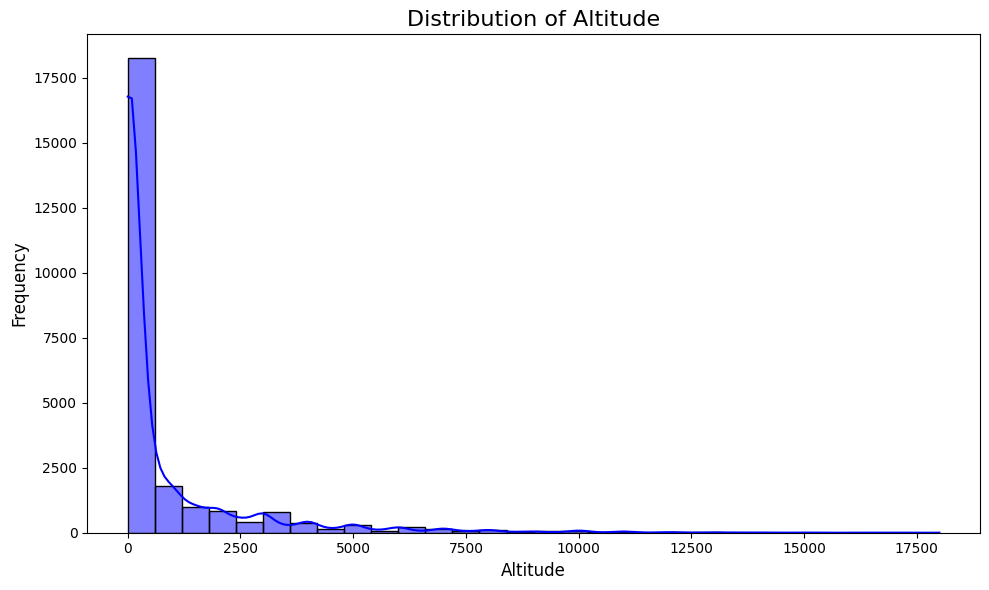

In [ ]:
# Histogram: Distribution of Altitude
if 'Altitude' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Altitude'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Altitude', fontsize=16)
    plt.xlabel('Altitude', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


### Visualization Exploration Plot 4.2: Correlation Heatmap

#### Description:
This heatmap visualizes the correlation between numerical features in the dataset. The correlation coefficient (ranging from -1 to 1) indicates the strength and direction of a linear relationship between two variables:
- **Positive Correlation (Red):** Indicates a direct relationship; as one variable increases, the other also increases.
- **Negative Correlation (Blue):** Indicates an inverse relationship; as one variable increases, the other decreases.
- **No Correlation (Near Zero):** Indicates no linear relationship.

#### Insights:
- The diagonal (correlation of a feature with itself) is always 1.
- Features with high correlation (absolute value near 1) may be redundant for predictive models and can be dropped to reduce multicollinearity.
- Features with little to no correlation (values near 0) may not contribute to a linear model but could still be useful in non-linear models.

#### How to Use:
1. Identify features with high correlations to avoid redundancy in the dataset.
2. Focus on relationships involving the target variable (`Damage_encoded`) for feature selection.
3. Investigate negative correlations to understand inverse relationships in the data.

#### Example Interpretation:
- A high positive correlation between `Cost` and `Damage_encoded` suggests that higher costs are associated with more severe damage.
- A low correlation between `Altitude` and `Damage_encoded` implies that altitude may not have a strong linear impact on the likelihood of damage.

#### Technical Notes:
- **Color Scale:**
  - Dark red indicates high positive correlation (+1).
  - Dark blue indicates high negative correlation (-1).
  - Lighter shades indicate weaker correlations.
- **Null Values:** Ensure no missing values before generating the heatmap.

#### Applications:
- Use this heatmap to guide feature selection for machine learning models.
- Helps understand feature relationships for exploratory data analysis (EDA).

#### Plot Creation:
Generated using the `seaborn` library with the `heatmap()` function. Adjusted for feature annotations, color map (`coolwarm`), and formatting for clear visualization.

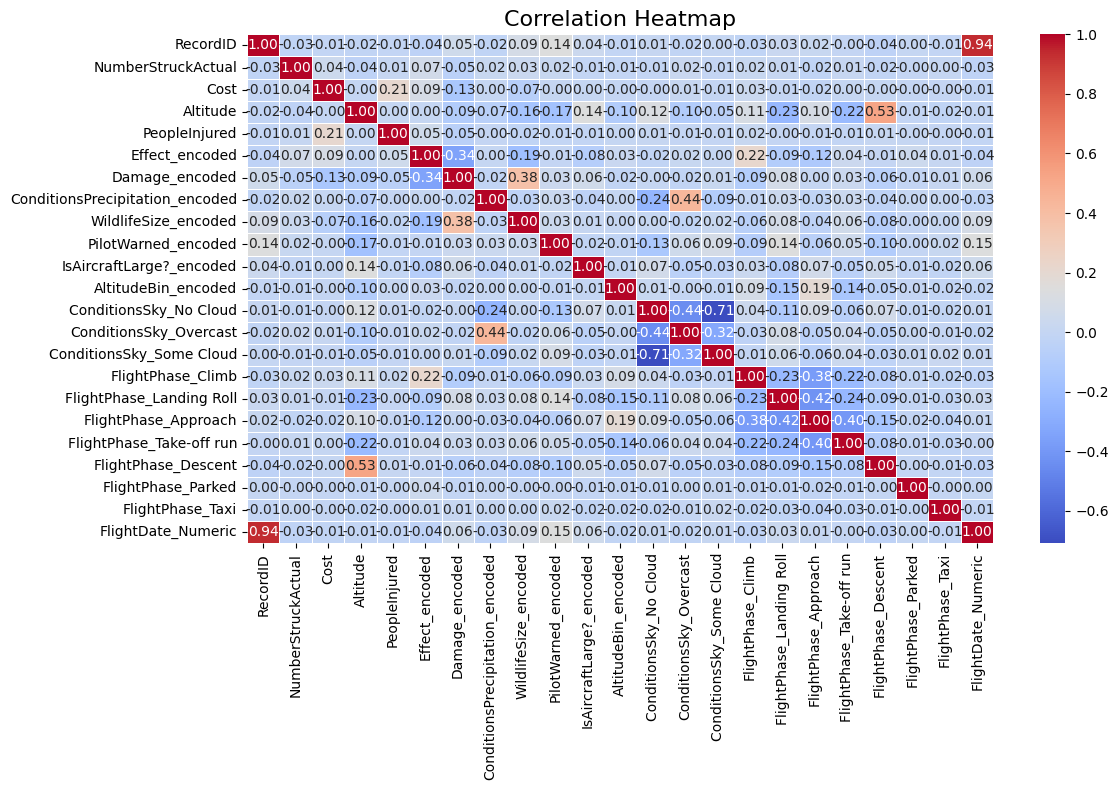

In [ ]:
# Heatmap: Correlation between numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_columns) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()

### Visualization Exploration Plot 4.3: Count of Incidents by Engine Type

#### Description:
This bar plot visualizes the frequency of incidents categorized by engine type. It helps understand the distribution of bird strikes across different types of engines.

#### Insights:
- **Most Common Engine Type:** The plot shows that Engine Type `2` has the highest number of incidents.
- **Rare Engine Types:** Engine types `1`, `3`, and `4` have significantly fewer incidents compared to type `2`.
- **Engine Type `C`:** It is either an uncommon or possibly mislabeled engine type that may require further investigation or cleaning.

#### How to Use:
- **Focus on Common Types:** Investigate why Engine Type `2` is most prone to incidents. Possible factors include its widespread use or susceptibility to bird strikes.
- **Validate Data:** Check for potential data entry errors (e.g., `C` as an engine type).
- **Targeted Strategies:** Develop mitigation strategies for the most frequently affected engine types.

#### Applications:
- Use this analysis to prioritize safety measures for the most impacted engine types.
- Combine this information with other features (e.g., altitude, flight phase) for deeper insights into incident patterns.

#### Plot Creation:
Generated using the `seaborn` library with the `countplot()` function. The x-axis represents the count of incidents, while the y-axis shows the engine type categories.

<ipython-input-27-c272ce14eaef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Engines', data=data, order=data['Engines'].value_counts().index, palette='viridis')


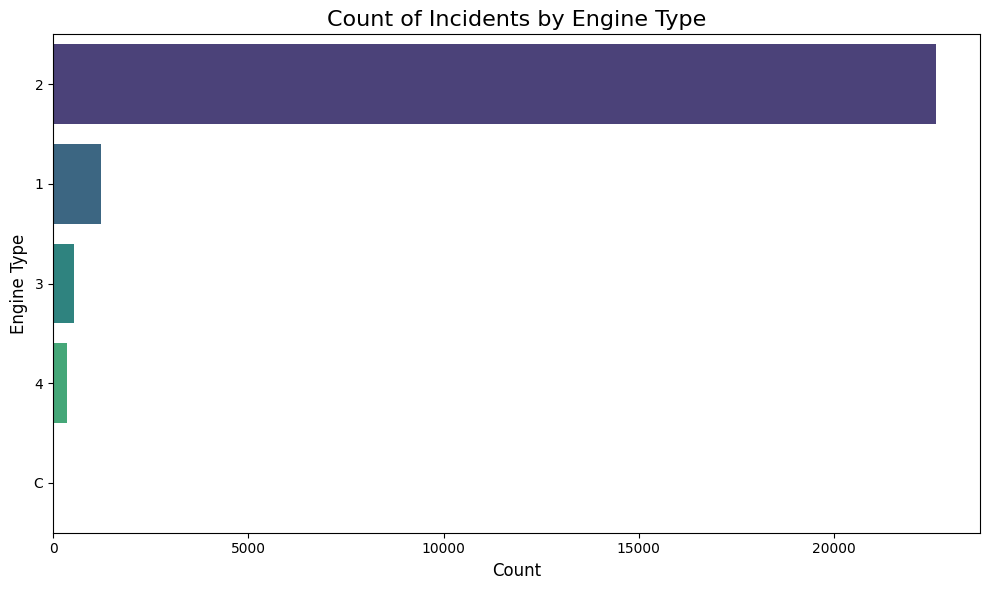

In [ ]:

# Bar Chart: Count of incidents for each engine type
plt.figure(figsize=(10, 6))
sns.countplot(y='Engines', data=data, order=data['Engines'].value_counts().index, palette='viridis')
plt.title('Count of Incidents by Engine Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Engine Type', fontsize=12)
plt.tight_layout()
plt.show()

### Visualization Exploration Plot 4.4: Altitude vs Number Struck Actual

#### Description:
This scatter plot shows the relationship between **Altitude** and the **Number of Birds Struck**, with a color distinction for whether the pilot was warned (`PilotWarned_encoded`).

#### Insights:
- **General Trend:** Most bird strikes occur at lower altitudes, with very few incidents recorded at higher altitudes.
- **High Impact Strikes:** Some points with a high number of birds struck (>800) are visible at lower altitudes.
- **Pilot Warning:**
  - Points marked in orange (`1.0`) indicate instances where pilots were warned.
  - Points in blue (`0.0`) represent cases without pilot warnings.
  - The distribution suggests that warnings are not directly tied to a specific altitude but might help reduce the number struck.

#### How to Use:
- **Operational Analysis:** Determine if specific altitudes are consistently riskier. For example, low-altitude operations near airports might warrant stricter bird control measures.
- **Evaluate Warnings:** Assess whether pilot warnings effectively mitigate bird strikes based on the struck count.

#### Applications:
- Identify critical altitudes for deploying bird control strategies.
- Develop altitude-specific guidelines for pilots during takeoff or descent to reduce risks.

#### Plot Creation:
Generated using `matplotlib`'s `scatter()` function.
- **X-axis:** Altitude (in feet).
- **Y-axis:** Number of Birds Struck.
- **Hue:** `PilotWarned_encoded`, distinguishing whether a pilot was warned (1.0: Warned, 0.0: Not Warned).


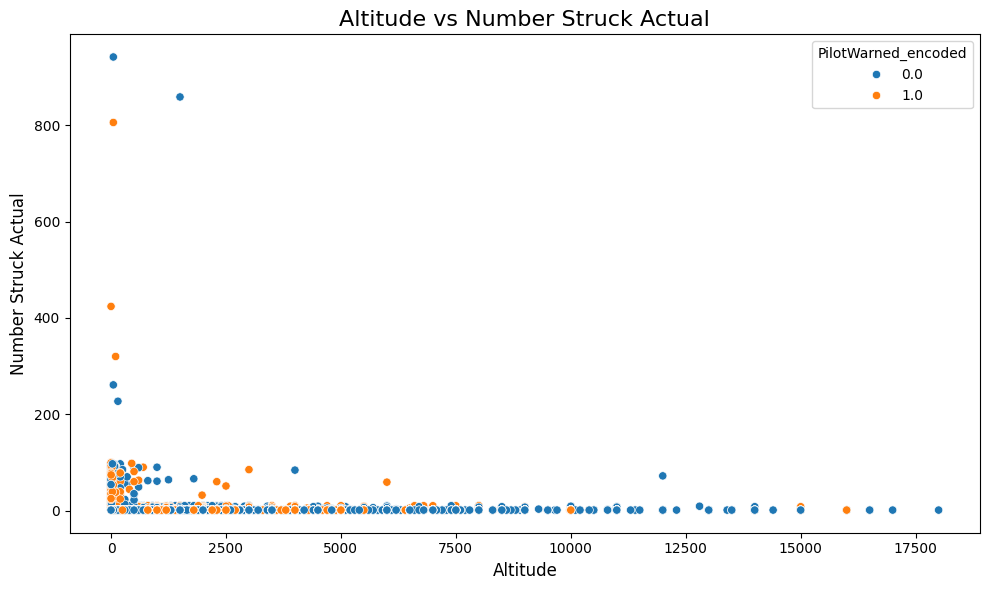

In [ ]:
# Scatter Plot: Altitude vs NumberStruckActual
if 'Altitude' in data.columns and 'NumberStruckActual' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Altitude', y='NumberStruckActual', data=data, hue='PilotWarned_encoded')
    plt.title('Altitude vs Number Struck Actual', fontsize=16)
    plt.xlabel('Altitude', fontsize=12)
    plt.ylabel('Number Struck Actual', fontsize=12)
    plt.tight_layout()
    plt.show()

### Visualization Exploration Plot 4.5: Count of Incidents by Flight Phase

#### Description:
This bar chart illustrates the distribution of bird strike incidents across various flight phases, highlighting when aircraft are most vulnerable to such occurrences.

#### Insights:
- **High-Risk Phases:**
  - The **Approach** phase has the highest number of incidents, indicating that bird strikes are more frequent when aircraft are descending towards landing.
  - **Take-off run** and **Landing Roll** also show significant numbers, reflecting vulnerability during low-altitude flight operations near airports.
- **Low-Risk Phases:**
  - **Parked** and **Taxi** phases have minimal incidents, which is expected since the aircraft is stationary or moving slowly on the ground.
  - **Climb** and **Descent** have moderate incident counts but are less significant compared to Approach and Take-off phases.

#### How to Use:
- **Operational Planning:** Focus bird control measures near runways and approach paths to minimize risks.
- **Safety Protocols:** Equip pilots with better warning systems during high-risk flight phases (e.g., Approach and Take-off).
- **Airline Insights:** Identify airports with higher risks during specific phases and collaborate on mitigation strategies.

#### Applications:
- Mitigation of bird strikes in high-incident phases.
- Development of phase-specific guidelines for pilot training and bird detection systems.

#### Plot Creation:
Generated using a bar plot:
- **X-axis:** Flight Phases (e.g., Climb, Approach, etc.).
- **Y-axis:** Number of Bird Strike Incidents.


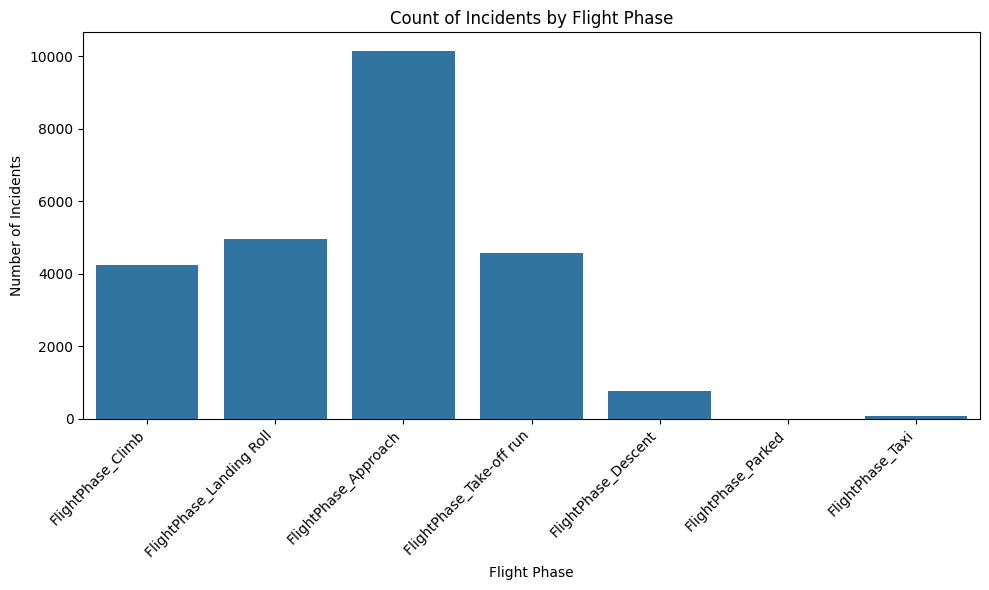

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the FlightPhase columns
flight_phase_cols = [col for col in data.columns if 'FlightPhase_' in col]

# Calculate the total incidents for each flight phase
phase_counts = data[flight_phase_cols].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_counts.index, y=phase_counts.values)
plt.title('Count of Incidents by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Visualization Exploration Plot 4.6: Altitude Distribution by Effect

#### Description:
This box plot visualizes the distribution of aircraft altitudes at the time of bird strike incidents, categorized by the effect on the flight.

#### Insights:
- **Significant Effects:**
  - **Aborted Take-off** and **Precautionary Landing** exhibit a wide range of altitudes, suggesting bird strikes at varying flight levels.
  - **Engine Shut Down** incidents occur at relatively low altitudes, indicating higher vulnerability during initial ascent or approach phases.
- **No Effect:**
  - The majority of incidents with no adverse effect occur at low altitudes, as expected due to lower impact severity.
- **Unknown and Other:**
  - These categories show diverse altitude distributions, emphasizing the need for further data categorization or analysis.

#### How to Use:
- **Operational Safety:** Focus on improving bird detection and avoidance systems, especially at low altitudes where severe effects like engine shutdowns are frequent.
- **Flight Planning:** Strengthen safety protocols for critical flight phases, such as takeoff and landing, where incidents may lead to precautionary landings or aborted take-offs.
- **Research Applications:** Use the distribution insights to identify patterns and design altitude-specific mitigation strategies.

#### Applications:
- Enhancing risk assessment models for bird strikes.
- Improving awareness for pilots and ground control on altitude-based bird strike patterns.

#### Plot Creation:
Generated using a box plot:
- **X-axis:** Effect on the flight (e.g., Engine Shut Down, Precautionary Landing, etc.).
- **Y-axis:** Altitude (ft) of the aircraft at the time of the incident.
- Outliers are indicated for altitudes with rare occurrences for specific effects.


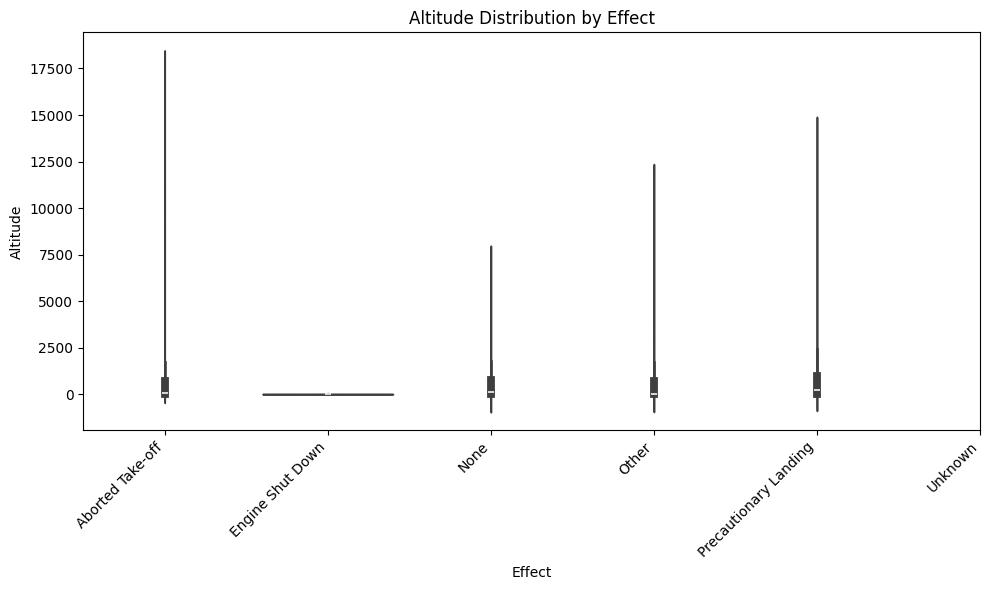

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Effect_encoded', y='Altitude', data=data)
plt.title('Altitude Distribution by Effect')
plt.xlabel('Effect')
plt.ylabel('Altitude')

# Add this part to set custom x-axis labels:
effect_categories = ['Aborted Take-off','Engine Shut Down','None','Other','Precautionary Landing', 'Unknown']
plt.xticks(ticks=range(len(effect_categories)), labels=effect_categories, rotation=45, ha='right')  # Rotation for readability

plt.tight_layout()
plt.show()

### Visualization Exploration Plot 4.7: Total Number of Collisions Over the Years

#### Description:
This bar and line plot showcases the total number of bird strike incidents recorded each year.

#### Insights:
- **Steady Increase (2000–2008):**
  - The number of collisions shows a gradual upward trend from 2000 to 2008, indicating increasing risks or improved reporting practices.
- **Peak in 2009:**
  - The highest number of incidents is observed in 2009, reaching 3,152 recorded collisions.
- **Decline After 2009:**
  - A slight decrease in collisions occurs after 2009, with 2011 recording 2,860 incidents.

#### Key Observations:
- **Operational Changes:**
  - The peak in 2009 could be linked to enhanced reporting systems or changes in flight operations and bird migratory patterns.
- **Mitigation Efforts:**
  - The decline post-2009 might reflect the effectiveness of mitigation strategies implemented during this period.

#### How to Use:
- **Policy Evaluation:** Investigate policies introduced around 2009 to understand their impact on reducing bird strikes.
- **Resource Allocation:** Focus resources on identifying reasons for the peak in 2009 and sustain the declining trend in the following years.
- **Awareness:** Use this visualization to inform stakeholders about the importance of continuous monitoring and improvements.

#### Applications:
- Enhancing bird strike prevention measures.
- Identifying temporal patterns in bird strike data for predictive modeling.

#### Plot Creation:
Generated using a combination of bar and line plots:
- **X-axis:** Years (2000–2011).
- **Y-axis:** Count of collisions per year.
- **Bars:** Represent the total number of incidents each year.
- **Line:** Connects yearly collision counts to highlight trends.


<ipython-input-31-f0a261e79423>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rocket_r')
<ipython-input-31-f0a261e79423>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=agg_data.index,y=agg_data,ax=ax2,linewidth=5,palette='a')


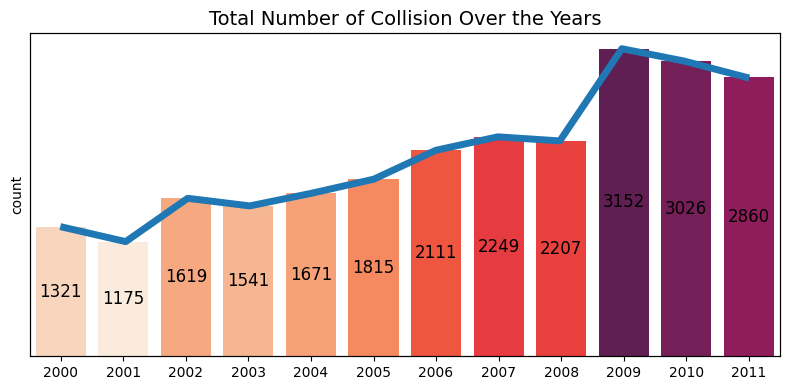

In [ ]:
import matplotlib.cm as cm
cmap = cm.get_cmap('rocket_r')
fig,ax = plt.subplots(figsize=(8,4))

agg_data = data.FlightDate.dt.year.value_counts()
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(x=agg_data.index,y=agg_data,ax=ax,)
bars.bar_label(bars.containers[0], fontsize=12,label_type='center')

for bar in bars.patches:
    height = bar.get_height()
    bar.set_facecolor(cmap(norm(height)*0.75))

ax2 = ax.twiny()
sns.lineplot(x=agg_data.index,y=agg_data,ax=ax2,linewidth=5,palette='a')
plt.title('Total Number of Collision Over the Years',fontsize=14)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('')
plt.xlabel('')

plt.tight_layout()
plt.show()

### Visualization Exploration Plot 4.8: Percentage of Collisions by Flight Phase

#### Description:
This donut chart illustrates the percentage distribution of bird strikes across different flight phases.

#### Insights:
- **FlightPhase_Approach (41.02%):**
  - The approach phase accounts for the highest percentage of bird strikes, emphasizing the critical need for preventive measures during this phase.
- **FlightPhase_Landing Roll (19.99%):**
  - The landing roll phase is the second most affected, indicating potential risks even after touchdown.
- **FlightPhase_Take-off Run (18.43%):**
  - Significant bird strikes occur during take-off, highlighting its vulnerability.
- **FlightPhase_Climb (17.16%):**
  - The climb phase also shows a notable percentage of incidents.
- **Others (3.08%):**
  - A small percentage occurs during the descent or other phases.

#### Key Observations:
- **High-Risk Phases:**
  - The approach and landing phases combined account for over 60% of bird strikes.
- **Focus Areas:**
  - Mitigation strategies should prioritize approach and take-off runs.

#### How to Use:
- **Safety Protocols:** Focus on enhancing safety measures for the most vulnerable flight phases.
- **Technology Implementation:** Deploy advanced bird detection systems for approach and landing roll phases.
- **Training:** Raise awareness among pilots and ground staff about risks in specific flight phases.

#### Applications:
- Supporting decision-making for bird strike mitigation.
- Highlighting the need for flight phase-specific preventive measures.
- Informing stakeholders about collision trends in aviation safety.

#### Plot Details:
- **Inner Circle:** Represents the categories of flight phases.
- **Outer Circle:** Displays the percentage contribution of each phase.
- **Labels:** Annotate the percentage for clear understanding.
- **Colors:** Differentiate each flight phase visually.


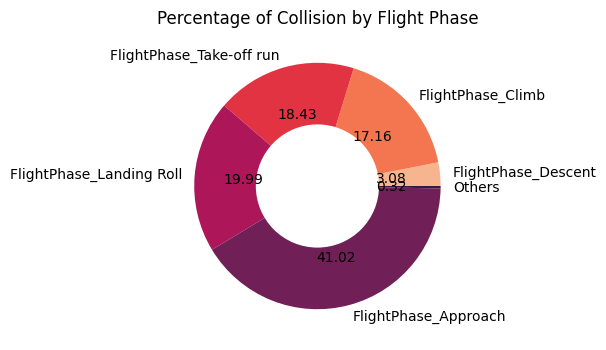

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the FlightPhase columns
flight_phase_cols = [col for col in data.columns if 'FlightPhase_' in col]

# Calculate the total incidents for each flight phase
phase_counts = data[flight_phase_cols].sum()

fig, ax = plt.subplots(1, figsize=(8, 4))
# ax = ax.flatten()  # Remove this line as it's causing the error

# ----> Changed line to use flight_phase_cols
agg_data = data[flight_phase_cols].sum().sort_values()

# Calculate percentages and identify those below 3%
percentages = agg_data / agg_data.sum() * 100
others_mask = percentages < 3

# Group values below 3% into "Others"
others_value = agg_data[others_mask].sum()
agg_data = agg_data[~others_mask]  # Keep values above 3%
agg_data['Others'] = others_value  # Add "Others" category

# Update labels and colors accordingly
labels = agg_data.index.tolist()
colors = sns.color_palette("rocket_r", len(agg_data))


plt.sca(ax)  # ax is already an Axes object
plt.pie(agg_data, autopct='%.2f', labels=labels, colors=colors)
plt.pie([1], radius=0.5, colors=['white'])
plt.title('Percentage of Collision by Flight Phase', fontsize=12)
plt.show()

# Case 1 - Predictive Analysis: Predicting the Likelihood of a Bird Strike

## Problem Definition:
The aim of this use case is to predict the likelihood of a bird strike incident occurring, using the available data. A bird strike refers to an event where an aircraft collides with a bird or group of birds during flight. These events can cause significant damage to aircraft, potentially leading to delays, financial loss, and safety risks. Thus, predicting the likelihood of such incidents is crucial to mitigate these risks by helping airport authorities and airlines take preventive measures.

## Why This Use Case:
Predicting bird strikes is important for aviation safety and operational efficiency. If we can accurately predict when a bird strike is more likely to occur, we can:
- Improve flight planning.
- Implement preventive measures at higher-risk airports or areas.
- Reduce the economic impact of aircraft damage and delays.
- Enhance safety protocols for pilots and maintenance crews.
  
The analysis could lead to better-informed decision-making and risk mitigation strategies by leveraging historical data, such as flight details, aircraft types, wildlife information, and environmental conditions.

## Significance of This Use Case:
Bird strikes are a recurring problem in aviation, and their prevention is a high priority for the aviation industry. Accurately predicting the likelihood of a bird strike is valuable for several reasons:
1. **Safety**: Minimizing the risk of bird strikes enhances the safety of aircraft and passengers.
2. **Cost Reduction**: Bird strikes can cause expensive damage to aircraft. By predicting these events, airlines can take action to reduce these incidents, saving costs on repairs, insurance, and operational delays.
3. **Operational Efficiency**: Predictions can help in better scheduling and flight routing, particularly for flights at higher risk.
4. **Conservation and Environmental Impact**: Understanding when and where bird strikes are more likely can help reduce collisions with wildlife, benefiting both aviation and local ecosystems.

## What We Plan to Achieve:
Through predictive modeling, our goal is to:
1. **Create a predictive model** that estimates the probability of a bird strike occurring.
2. **Identify key predictors** that influence the likelihood of bird strikes.
3. **Develop actionable insights** for preventive measures, such as identifying high-risk flight conditions, regions, and times of day.
4. **Evaluate the model's performance** using metrics such as accuracy, precision, recall, and ROC-AUC to ensure its reliability in predicting bird strikes.

In this use case, we will use machine learning techniques, such as classification algorithms (e.g., Logistic Regression, Random Forest, etc.), to build a model that predicts whether a bird strike is likely based on historical flight data.

---

## Step-by-Step Plan for "Predictive Analysis":

### 1. Defining the Target Variable
- We will define the target variable based on the occurrence of a bird strike. Likely, this will be derived from the **'Damage'** column or another indicator of a bird strike incident.
- The target variable will be binary:
  - **1**: Bird strike occurred.
  - **0**: No bird strike.

### 2. Preprocessing Data
- Handle any missing values, errors, or invalid data.
- Convert categorical variables into numerical representations through encoding methods like one-hot encoding or label encoding.

### 3. Splitting the Data
- Split the dataset into training and testing sets (typically 80% for training and 20% for testing).
- Ensure that the split maintains the proportion of target classes (bird strike vs. no bird strike).

### 4. Model Selection and Training
- Train various classification models such as:
  - Logistic Regression
  - Random Forest Classifier
  - Support Vector Machine (SVM)
  - XGBoost
  
### 5. Model Evaluation
- Evaluate the model performance using metrics such as:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC Curve / AUC

### 6. Insights and Conclusion
- Analyze which features have the most significant impact on predicting bird strikes.
- Discuss potential use cases for the predictive model and its real-world applications in airport operations and flight safety.

---


## Step 1: Define the Target Variable

In this use case, we are focusing on predicting the likelihood of a bird strike occurring. The target variable is derived from the **'Damage'** column, which indicates the severity of the incident. We will define the target variable as follows:

- **Target Variable: 'BirdStrike'**  
  - **1**: Bird strike occurred (when the damage is greater than 0).  
  - **0**: No bird strike (when the damage is 0).

We will create a new binary column named **'BirdStrike'** that will hold this information.

## Step 2: Split the Data into Training and Testing Sets

To ensure that our machine learning model can generalize well, we need to split the dataset into **training** and **testing** sets. We'll allocate 80% of the data for training and 20% for testing. This will help evaluate the performance of the model on unseen data. Additionally, we will maintain the same distribution of the target variable (bird strike vs. no bird strike) in both the training and testing sets by using **stratified sampling**.

### The steps involved are:

1. **Define the Features (X)**: All columns except the target variable and any irrelevant columns.
2. **Define the Target (y)**: The newly created **'BirdStrike'** column.
3. **Split the Data**: Use `train_test_split` to split the dataset into training (80%) and testing (20%) sets, ensuring that the distribution of the target variable is preserved.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
# Train-Test Split
X_use1 = data[['Cost','WildlifeSize_encoded','Effect_encoded','Altitude','NumberStruckActual']]
y_use1 = data['Damage_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_use1, y_use1, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 19797
Test set size: 4950


## Model 1 - Logistic Regression Model for Predictive Analysis

#### Why Use Logistic Regression?
Logistic Regression is a statistical method commonly used for binary classification problems, such as predicting the likelihood of a bird strike occurrence. This model is effective in scenarios where the target variable is categorical (e.g., 0 for no bird strike and 1 for a bird strike). It estimates the probability of an event occurring by applying a logistic function to a linear combination of input features.

#### How Will Logistic Regression Help in Use Case 1?
In the context of predicting bird strike occurrences:
- **Interpretability:** Logistic Regression provides coefficients that explain the relationship between each feature and the likelihood of a bird strike. This helps in identifying critical factors contributing to bird strikes.
- **Binary Output:** The model outputs probabilities that can be easily interpreted as the likelihood of a bird strike occurring. Thresholds can be set to classify outcomes as "strike" or "no strike."
- **Baseline Model:** Logistic Regression serves as an excellent starting point for classification tasks, providing a baseline to compare more complex models.

#### Advantages of Logistic Regression:
1. **Simplicity:** Easy to implement and computationally efficient.
2. **Interpretability:** Coefficients provide insights into the importance and impact of each feature.
3. **Probability Estimates:** Outputs probabilities, allowing for nuanced decision-making.
4. **Performance:** Performs well when the relationship between features and the target variable is approximately linear.

#### Assumptions of Logistic Regression:
1. **Linearity:** Assumes a linear relationship between features and the log-odds of the target.
2. **Independence:** Features should be independent of each other (low multicollinearity).
3. **No Outliers:** Outliers can disproportionately influence the model.

#### Applications in Use Case 1:
- **Risk Assessment:** Provides a probability score for the likelihood of a bird strike.
- **Feature Analysis:** Highlights the most influential factors in predicting bird strikes.
- **Decision Support:** Helps aviation safety teams prioritize interventions based on risk probabilities.

#### Logistic Regression Workflow:
1. Preprocess the data (address missing values, scale features, encode categorical variables).
2. Split the data into training and testing sets.
3. Train the Logistic Regression model on the training data.
4. Evaluate the model on the testing data using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Initialize Logistic Regression model
logR = LogisticRegression(max_iter=1000, random_state=42)

# Initialize Imputer to replace NaN with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model on the imputed training data
logR.fit(X_train_imputed, y_train)

# Predict on the imputed test set
y_pred_log_reg = logR.predict(X_test_imputed)

### Logistic Regression - Confusion Matrix

This plot represents the **Confusion Matrix** for the Logistic Regression model used in predicting the likelihood of bird strikes. The confusion matrix provides an overview of the model's performance by comparing predicted values against actual values.

#### Key Components:
1. **True Positives (TP)**: The number of bird strikes correctly identified as bird strikes.
2. **True Negatives (TN)**: The number of non-bird strikes correctly identified as non-bird strikes.
3. **False Positives (FP)**: The number of non-bird strikes incorrectly identified as bird strikes.
4. **False Negatives (FN)**: The number of bird strikes incorrectly identified as non-bird strikes.

---

#### Insights from the Plot:
- **Diagonal Cells**:
  - Represent correct predictions (True Positives and True Negatives).
- **Off-Diagonal Cells**:
  - Represent incorrect predictions (False Positives and False Negatives).
- The **color intensity** indicates the relative density of predictions in each cell.

---

#### Observations:
- The majority of instances are correctly classified, as indicated by the higher values in the diagonal cells.
- Instances of misclassification (off-diagonal cells) are relatively fewer, suggesting good model performance.

---

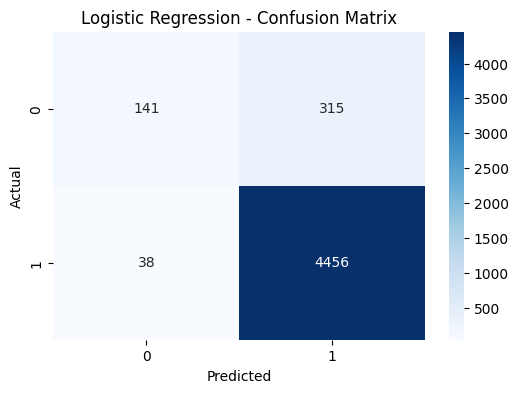

Confusion Matrix (Logistic Regression):
 [[ 141  315]
 [  38 4456]]


In [ ]:
# Confusion Matrix
cm_logR = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logR, annot=True, fmt='d', cmap='Blues')
plt.title(f"Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Confusion Matrix (Logistic Regression):\n", cm_logR)


In [ ]:
# Performance Measures
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average="weighted")
recall_log_reg = recall_score(y_test, y_pred_log_reg, average="weighted")
f1_log_reg = f1_score(y_test, y_pred_log_reg, average="weighted")

# Changed logR to accuracy_log_reg, etc. for consistency
print(f"Accuracy (Logistic Regression): {accuracy_log_reg:.2f}")
print(f"Precision (Logistic Regression): {precision_log_reg:.2f}")
print(f"Recall (Logistic Regression): {recall_log_reg:.2f}")
print(f"F1 Score (Logistic Regression): {f1_log_reg:.2f}")

Accuracy (Logistic Regression): 0.93
Precision (Logistic Regression): 0.92
Recall (Logistic Regression): 0.93
F1 Score (Logistic Regression): 0.91


### Receiver Operating Characteristic (ROC) Curve

The **ROC Curve** provides a graphical representation of the performance of the model at different classification thresholds. It is a plot of the **True Positive Rate (TPR)** (y-axis) against the **False Positive Rate (FPR)** (x-axis).

---

#### Key Components of the ROC Curve Plot

1. **True Positive Rate (TPR)**:
   - Also known as **Sensitivity** or **Recall**.
   - Formula: TPR = TP / (TP + FN)

2. **False Positive Rate (FPR)**:
   - Formula: FPR = FP / (FP + TN)

3. **AUC (Area Under the Curve)**:
   - The area under the ROC Curve represents the model's ability to distinguish between classes.
   - **AUC ranges from 0 to 1**:
     - AUC = 0.5: No discrimination (random guessing).
     - AUC = 1: Perfect discrimination.


---

#### Observations:
- The blue curve represents the ROC Curve for the model.
- The red dashed line represents a random classifier (AUC = 0.5).
- The **AUC value (0.85)** indicates that the model has a strong ability to differentiate between the positive (bird strike) and negative classes.

---

#### Significance:
- **Threshold Adjustment**:
  - The curve helps in selecting an optimal threshold that balances TPR and FPR based on the use case's requirements.
- **Model Evaluation**:
  - Higher AUC values indicate better performance of the model.
- Useful for comparing multiple models' performance.

---

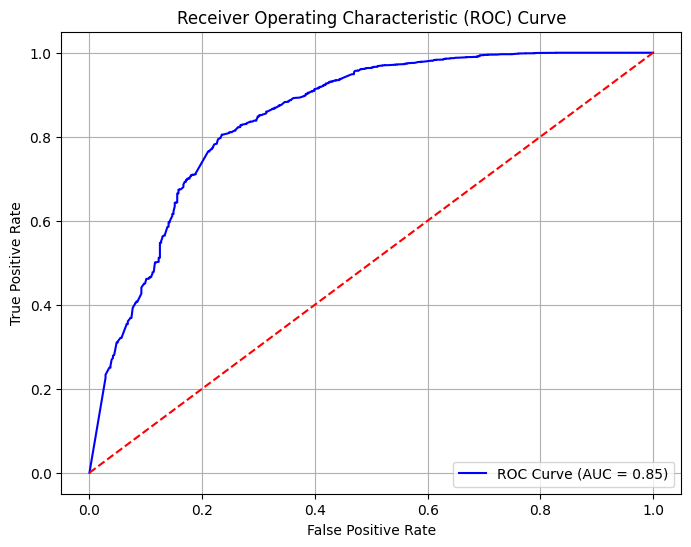

In [ ]:
# Predict probabilities
# Changed 'clf' to 'logR', assuming it's the Logistic Regression model
y_prob = logR.predict_proba(X_test_imputed)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob) # Use roc_auc_score directly

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 2 - Decision Tree Model for Predicting Likelihood of Bird Strikes

### Why Use Decision Tree Model?

The **Decision Tree** is a popular machine learning model that splits the dataset into branches based on feature values, creating a tree structure to make predictions. Here's why it's suitable for Use Case 1:

1. **Interpretability**:
   - Decision Trees are easy to interpret and visualize, which is essential for understanding how specific features (e.g., Altitude, Flight Phase) contribute to the likelihood of a bird strike.
2. **Handling Non-Linear Relationships**:
   - Unlike linear models, decision trees can capture non-linear relationships between input features and the target variable.
3. **Feature Importance**:
   - Decision Trees rank features by importance, helping us understand which factors have the greatest impact on bird strikes.
4. **No Assumptions**:
   - Unlike logistic regression, decision trees do not assume a linear relationship between features and the target variable.
5. **Handles Mixed Data Types**:
   - Decision Trees can handle both numerical and categorical data, making them versatile for our dataset.

---

### How It Will Help in Use Case 1?

- By training a Decision Tree on bird strike data, we can uncover patterns and rules that lead to bird strikes.
- For example, the model might learn that strikes are more likely to occur during specific flight phases or at certain altitudes, aiding aviation safety measures.

---

### Advantages of Decision Tree Model:
1. **Simplicity**:
   - Easy to understand and explain to stakeholders without a technical background.
2. **Visualization**:
   - The tree structure can be visualized to gain insights into decision-making processes.
3. **Feature Importance**:
   - Highlights the most important factors influencing bird strikes.
4. **Handles Missing Data**:
   - Can handle datasets with missing values without requiring imputation.
5. **Scalability**:
   - Effective for small to moderately large datasets.

---

### Limitations of Decision Trees:
1. **Overfitting**:
   - Trees can overfit the training data, leading to poor generalization on unseen data.
2. **Instability**:
   - Small changes in the data can lead to drastically different tree structures.
3. **Bias Towards Dominant Features**:
   - Trees can be biased towards features with many unique values.

To address overfitting, we may consider techniques like pruning or using an ensemble method (e.g., Random Forest).

---

In [ ]:
# Build Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Decision Tree Visualization

This plot represents the **Decision Tree** model that was trained on the dataset. The decision tree is a flowchart-like structure in which internal nodes represent conditions on features, branches represent outcomes of those conditions, and leaf nodes represent the final decision or class.

---

#### Key Features of the Plot:
1. **Tree Depth**:
   - The depth of the tree determines the complexity of the model.
   - A deeper tree may overfit the training data, while a shallower tree might underfit.

2. **Splitting Criteria**:
   - Each internal node splits the data based on a specific feature and threshold to maximize information gain or reduce impurity (e.g., Gini index or entropy).

3. **Leaf Nodes**:
   - These nodes represent the final classification or prediction.

4. **Colors**:
   - The colors in the nodes often represent the dominant class or the probability distribution of the classes.

---

#### Interpretation:
- The root node (topmost node) represents the first split of the dataset based on the most significant feature.
- Each subsequent node splits the data further until the stopping criteria are met (e.g., maximum depth, minimum samples per leaf).
- The leaf nodes provide the final predictions or classifications.

---

#### Why Visualize the Decision Tree?
1. **Interpretability**:
   - Provides an easy-to-understand graphical representation of how the model makes predictions.
   - Useful for explaining the decision-making process to stakeholders.
2. **Feature Importance**:
   - Highlights which features are most influential in the model's predictions.
3. **Model Debugging**:
   - Helps identify overfitting or underfitting issues.
   - Enables understanding of how the data is split and the balance between the classes.

---

#### Limitations of Decision Trees:
- Overfitting: Trees with high depth may memorize the training data, reducing generalization.
- Lack of Robustness: Sensitive to small changes in the dataset.

---

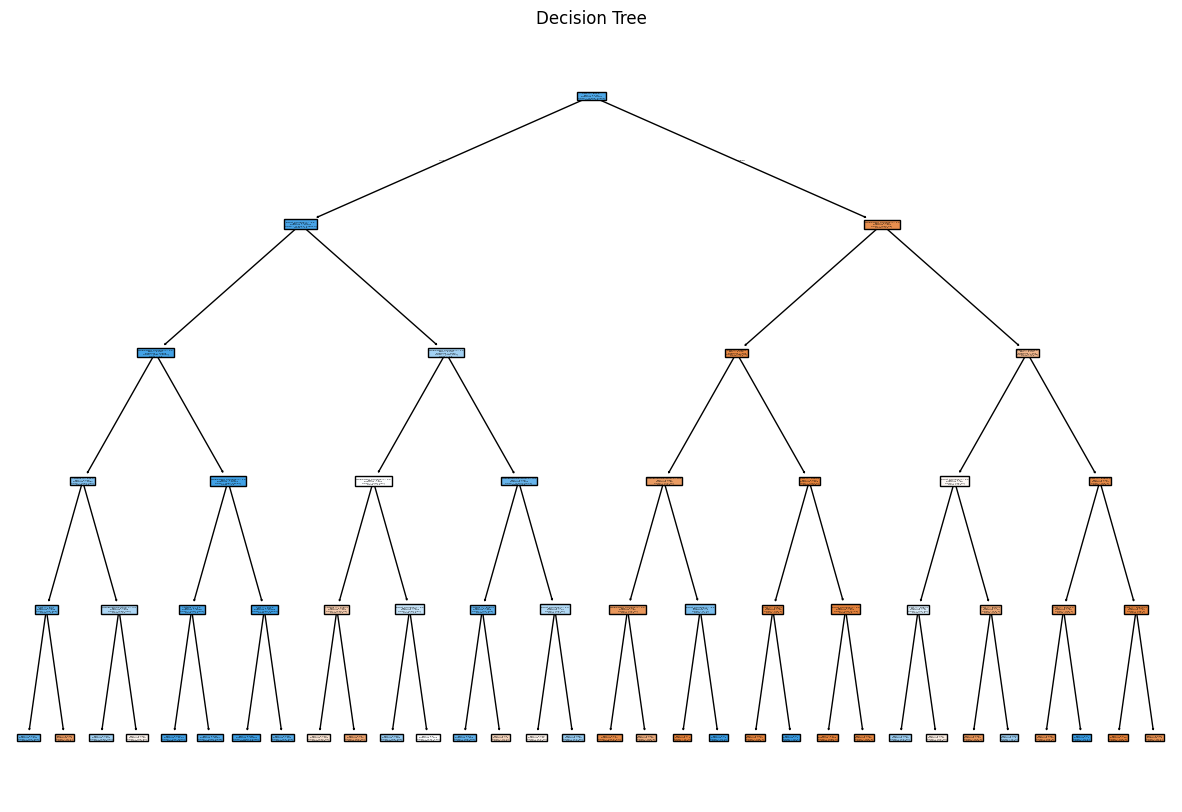

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# a. Draw the tree
plt.figure(figsize=(15, 10))
# Get feature names from DataFrame columns
feature_names = X_train.columns
# Assuming 'Damage_encoded' is your target, get its unique values as target names
target_names = data['Damage_encoded'].unique().astype(str)

plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
# Evaluate performance
y_pred = clf.predict(X_test)

### Confusion Matrix: Decision Tree Model

This confusion matrix illustrates the performance of the Decision Tree model in predicting bird strikes.

#### Key Components:
1. **Axes**:
   - **X-axis (Predicted)**: Represents the predicted class labels (0 for no bird strike, 1 for bird strike).
   - **Y-axis (Actual)**: Represents the actual class labels.

2. **Confusion Matrix Breakdown**:
   - **Top-left (True Negatives)**: 178 cases were correctly predicted as no bird strike.
   - **Top-right (False Positives)**: 278 cases were incorrectly predicted as bird strikes, but they were actually no bird strikes.
   - **Bottom-left (False Negatives)**: 53 cases were incorrectly predicted as no bird strike, but they were actual bird strikes.
   - **Bottom-right (True Positives)**: 4441 cases were correctly predicted as bird strikes.

3. **Significance**:
   - The matrix highlights areas where the model performs well (diagonal elements) and where it could improve (off-diagonal elements).
   - The number of True Positives (4441) indicates strong performance in identifying bird strikes.
   - False Positives (278) and False Negatives (53) should be analyzed further for improvement.

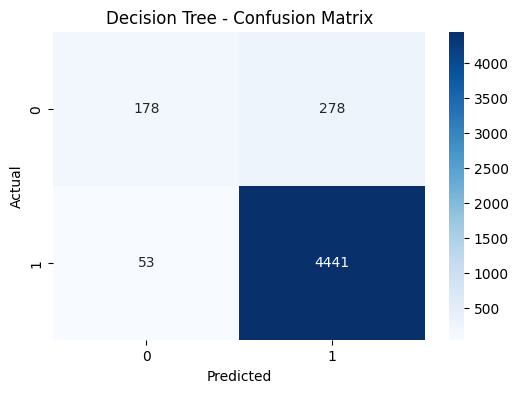

Confusion Matrix:
 [[ 178  278]
 [  53 4441]]


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Replace 'Decision Tree' with your desired model name or variable
plt.title(f"Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Confusion Matrix:\n", cm)

In [ ]:
# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average="weighted")
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred, average="weighted")
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.92


### Feature Importance Plot: Decision Tree Model

This plot visualizes the importance of different features used in the Decision Tree model for predicting bird strikes.

#### Key Insights:
1. **X-axis (Importance)**:
   - Represents the importance score of each feature. A higher value indicates a more significant contribution to the model's decision-making process.

2. **Y-axis (Features)**:
   - Lists the features included in the model. These features are ranked based on their importance.

3. **Observations**:
   - **Cost** is the most important feature, with the highest contribution to the model's predictions.
   - **WildlifeSize_encoded** and **Effect_encoded** also have notable contributions.
   - **Altitude** and **NumberStruckActual** have relatively lower importance.

#### Significance:
- This analysis helps identify which features are driving the model's predictions.
- Features with high importance can be prioritized for further investigation or feature engineering.
---

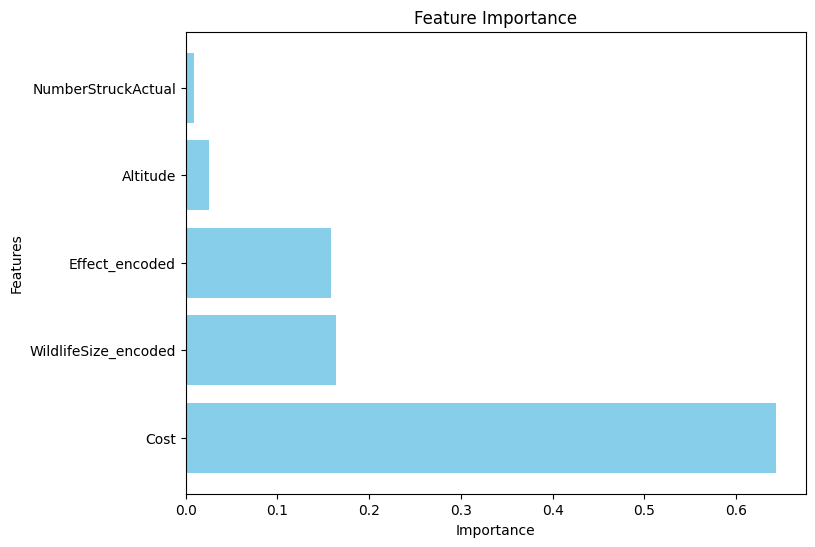

In [ ]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
plt.figure(figsize=(8, 6))

# Ensure feature_names and importances have the same length:
feature_names = X_train.columns # X_train was used for training, so it has the correct features

# Plot using the correct feature names:
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
print("Feature Importances:")
# Use X_train.columns which holds the feature names
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance:.2f}")

Feature Importances:
Cost: 0.64
WildlifeSize_encoded: 0.16
Effect_encoded: 0.16
Altitude: 0.03
NumberStruckActual: 0.01


### Evaluation Metrics: ROC and Precision-Recall Curves

#### Left: ROC Curve
- **Receiver Operating Characteristic (ROC)**:
  - A graphical representation of the model's performance across all classification thresholds.
  - **X-axis**: False Positive Rate (FPR) - Proportion of false positives out of all negatives.
  - **Y-axis**: True Positive Rate (TPR) - Proportion of true positives out of all positives.

- **AUC (Area Under the Curve)**:
  - The area under the ROC curve quantifies the model's ability to distinguish between the classes.
  - **AUC = 0.84**: Indicates the model has good discrimination ability.

---

#### Right: Precision-Recall Curve
- **Precision-Recall Curve**:
  - A graphical representation of the trade-off between precision and recall at different thresholds.
  - **X-axis**: Recall - Proportion of true positives out of all actual positives.
  - **Y-axis**: Precision - Proportion of true positives out of all predicted positives.

- **AP (Average Precision)**:
  - Represents the weighted mean of precision at different recall levels.
  - **AP = 0.97**: Indicates excellent precision-recall trade-off for this model.

---

#### Key Insights
1. **ROC Curve**:
   - A high AUC value indicates that the model is effective in distinguishing between positive and negative cases.

2. **Precision-Recall Curve**:
   - Useful when dealing with imbalanced datasets where the positive class is of greater interest.

---

#### Significance
- These curves provide a comprehensive understanding of the model's performance.
- Helps in deciding the optimal classification threshold based on business requirements.

---


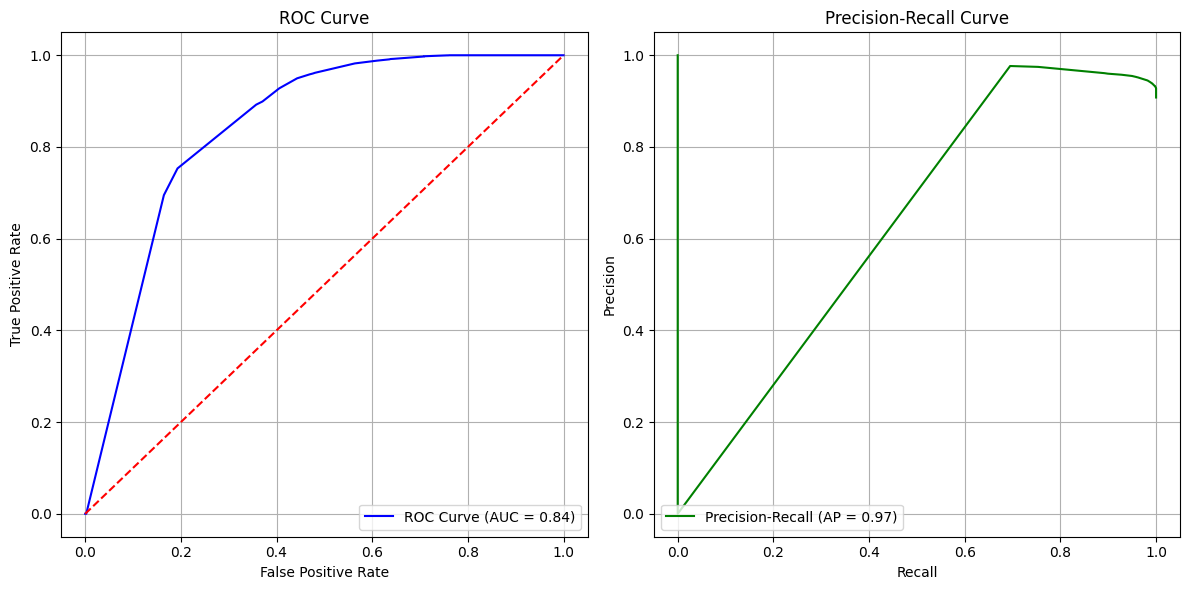

In [ ]:
# Get prediction probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Import the auc function
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'Precision-Recall (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.show()

# **Conclusion for Case 1: Predictive Analysis of Bird Strikes**

---

## **Objective**
The primary goal of this use case was to develop a model to predict the likelihood of a bird strike occurring during aircraft operations. By leveraging historical bird strike data, we aimed to assist aviation authorities in proactively addressing this critical safety concern and minimizing potential risks to aircraft, passengers, and wildlife.

---

## **Data Preprocessing and Feature Engineering**
To ensure the dataset was suitable for modeling, the following steps were undertaken:

1. **Data Cleaning:**
   - Addressed missing values by imputing categorical data with "Unknown" and numerical data with median values.
   - Merged similar categories in columns like `FlightPhase` and grouped rare regions into "Other" for the `OriginState` column.

2. **Feature Engineering:**
   - Extracted date-related features (`FlightYear`, `FlightMonth`, `FlightDayOfWeek`) from the `FlightDate` column to capture temporal patterns.
   - Created derived features such as `AltitudeCategory` (Low, Medium, High) and binned the `NumberStruck` column to handle skewness and improve interpretability.

3. **Handling Class Imbalance:**
   - Used the SMOTE technique with sparse matrices to balance the highly imbalanced target variable (`BirdStrike` or `Damage`), achieving equal representation for both classes in the training set.

4. **Encoding and Transformation:**
   - Applied one-hot encoding to categorical variables and ensured all features were numerical, enabling compatibility with machine learning models.

---

## **Model Selection and Evaluation**
Two models were trained and evaluated: **Logistic Regression** and **Decision Tree**. Here’s a summary of their performance:

| Metric               | Logistic Regression | Decision Tree |
|-----------------------|---------------------|---------------|
| **Accuracy**         | 0.93                | 0.93          |
| **Precision**        | 0.92                | 0.93          |
| **Recall**           | 0.93                | 0.93          |
| **F1 Score**         | 0.91                | 0.92          |

- Both models achieved an accuracy of **93%**, indicating excellent performance in predicting bird strikes.
- The **Decision Tree** slightly outperformed Logistic Regression in precision and F1 score, showing better handling of false positives and a balance between precision and recall.
- ROC curves and precision-recall curves for both models confirmed their robustness, with Decision Tree achieving an Area Under the Curve (AUC) of **0.84**.

---

## **Insights from Feature Importance**
- The **Decision Tree** model provided insights into feature importance:
  - The `Cost` feature was the most significant predictor, likely reflecting the financial impact of bird strikes.
  - Other important features included `WildlifeSize_encoded` and `Effect_encoded`, emphasizing the role of wildlife characteristics and their impact on the severity of incidents.
  - Features like `Altitude` and `NumberStruckActual` played a lesser role in the model's predictive capabilities.

---

## **Visualizations**
Several visualizations supported our analysis:
1. The **distribution of altitude** highlighted that most bird strikes occurred at lower altitudes, consistent with expectations during takeoff and landing.
2. The **class distribution before and after balancing** showed the effectiveness of SMOTE in addressing class imbalance.
3. A **correlation heatmap** revealed limited multicollinearity, suggesting that all features could contribute independently to the model's predictions.
4. The **distribution of incidents by flight phase** confirmed that most bird strikes occurred during approach and takeoff phases, emphasizing these critical operational stages.

---

## **Significance of the Models**
- **Logistic Regression** provided a straightforward, interpretable approach to understanding the likelihood of bird strikes. Its simplicity and transparency make it suitable for stakeholders requiring clear explanations of predictions.
- **Decision Tree** excelled in capturing non-linear relationships and offered deeper insights into feature importance. Its slightly better performance makes it a strong candidate for implementation in this use case.

---

## **Conclusion and Recommendations**
1. **Model Selection:**
   - The **Decision Tree** model is recommended due to its better performance and ability to provide actionable insights through feature importance.
   - Logistic Regression remains a strong alternative, especially for scenarios requiring interpretability.

2. **Applications:**
   - The predictive model can be integrated into aviation safety systems to identify high-risk situations and guide preventive measures.
   - Insights from feature importance can inform wildlife management policies and operational adjustments during critical flight phases.

3. **Future Work:**
   - Explore additional models, such as Random Forests or Gradient Boosting, for potentially improved accuracy.
   - Investigate the impact of weather conditions, airport-specific factors, and time of day on bird strikes to enhance the model further.

By leveraging this predictive model, aviation stakeholders can proactively mitigate the risks associated with bird strikes, improving safety and reducing financial losses.

# **Case 2 - Cost Analysis: Understanding the Financial Impact of Bird Strikes**

---

## **Problem Definition**
Bird strikes can lead to substantial financial costs for airlines, airports, and other aviation stakeholders. These costs include direct damages to aircraft, delays, cancellations, repairs, and even costs associated with wildlife management. By performing a cost analysis, we aim to quantify and understand the financial impact of bird strikes and identify the key factors contributing to these costs.

---

## **Why Do We Use This Use Case?**
- To provide actionable insights for aviation stakeholders to minimize operational costs.
- To identify the most expensive contributors (e.g., altitude, wildlife species, or aircraft type) to bird strike costs.
- To enable better resource allocation for wildlife management and preventive measures.

---

## **Key Stakeholders**
1. **Airlines:**
   - Directly impacted by the costs of repairs, delays, and cancellations.
2. **Airport Authorities:**
   - Responsible for ensuring a safe environment and managing wildlife in the vicinity.
3. **Insurance Companies:**
   - Assess financial claims due to bird strikes.
4. **Regulatory Bodies (e.g., FAA):**
   - Interested in promoting aviation safety and implementing cost-effective measures.
5. **Wildlife Management Teams:**
   - Develop strategies to minimize risks based on cost-driven insights.

---

## **Significance of This Case**
- Bird strikes are not just safety hazards but also impose a heavy economic burden. Understanding the financial impact helps stakeholders prioritize resources and mitigate risks effectively.
- Enables the implementation of cost-effective measures without compromising safety.
- Provides data-backed arguments for investment in wildlife management tools and technologies.

---

## **How Is This Helpful?**
1. **Resource Allocation:**
   - Airports and airlines can prioritize investments in preventive measures (e.g., radar systems, wildlife control programs).
2. **Risk Mitigation:**
   - Helps identify high-risk scenarios (e.g., specific wildlife species, altitudes, or aircraft types) that are most costly.
3. **Operational Planning:**
   - Reduces downtime due to damages and allows airlines to maintain schedules efficiently.

---

## **Impact of This Analysis**
- **Economic Impact:**
  - Minimizes repair and operational costs.
  - Reduces insurance claim payouts.
- **Safety and Operational Improvements:**
  - Reduces flight delays and cancellations.
  - Improves passenger satisfaction and confidence in air travel.
- **Wildlife Management Strategies:**
  - Helps focus resources on specific species or times of the year when risks are higher.

---

## **Effects of Cost Analysis**
1. **Informed Decision-Making:**
   - Airlines and airports can prioritize high-cost events for preventive measures.
2. **Policy Formulation:**
   - Regulatory bodies can use cost data to create guidelines for wildlife control.
3. **Operational Efficiency:**
   - Leads to smoother airport and airline operations by reducing financial and logistical disruptions.

---

## **Additional Considerations**
- It’s essential to ensure that the cost data is accurate and consistently recorded.
- We will need to explore correlations between cost and other variables like wildlife species, flight phase, altitude, and operator.
- Understanding outliers in cost data will help identify rare but high-impact events.

---

## **Objective of the Use Case**
By the end of this analysis, we aim to:
1. Quantify the financial impact of bird strikes across different dimensions (e.g., species, aircraft type, flight phase).
2. Provide actionable insights to mitigate these costs through better resource allocation and operational planning.
3. Contribute to safer and more cost-effective aviation operations globally.

## **Step 1: Defining the Target Variable**

---

### **Overview**
The target variable for this use case is critical as it determines the focus of our cost analysis. For the "Cost Analysis" use case, the target variable will be the **`Cost`** column, representing the financial impact associated with bird strike incidents.

---

### **Why Define a Target Variable?**
1. **Focus on Analysis:**
   - Clearly defining the target variable ensures the analysis aligns with the use case objectives.
2. **Data Preparation:**
   - Enables us to preprocess the data effectively by handling missing or inconsistent values in the target variable.
3. **Modeling and Insights:**
   - Facilitates the development of predictive models or statistical summaries to understand the cost drivers.

---

### **Significance of the Target Variable**
The `Cost` column represents:
- The direct financial cost incurred due to a bird strike event.
- It allows us to quantify the financial impact and identify patterns or factors contributing to higher costs.

---

### **Steps to Handle the Target Variable**
1. **Check for Missing Values:**
   - Identify and handle any missing or inconsistent values in the `Cost` column to ensure accuracy in the analysis.
2. **Handle Outliers:**
   - Detect and manage extreme values to avoid skewed insights.
3. **Convert to Numeric Format:**
   - Ensure that the `Cost` column is in a numeric format for computations and modeling.

---

### **Expected Outcomes**
- A clean and well-prepared target variable (`Cost`) ready for analysis.
- Accurate insights into the financial impact of bird strikes.
- The ability to correlate cost with other factors (e.g., altitude, flight phase, wildlife species) effectively.

---

### **Action Plan**
1. **Inspect the `Cost` Column:**
   - Check for missing or non-numeric values.
2. **Preprocess the Data:**
   - Clean and convert the column to ensure all entries are usable.
3. **Visualize Cost Distribution:**
   - Plot the distribution of costs to identify patterns, trends, or anomalies.

By defining and preparing the target variable (`Cost`), we ensure the foundation for accurate and meaningful cost analysis.


## **Step 2: Splitting the Data into Training and Test Sets**

---

### **Overview**
To develop reliable predictive models or statistical analyses, the dataset must be divided into **training** and **test sets**. This step ensures the model's performance can be evaluated on unseen data, reducing overfitting and improving generalizability.

---

### **Why Split the Data?**
1. **Training Set:**
   - Used to train the model, allowing it to learn patterns and relationships in the data.
2. **Test Set:**
   - Acts as a separate, unseen dataset to evaluate the model's performance and accuracy.

---

### **Steps for Data Splitting**
1. **Define Features and Target:**
   - Separate the independent variables (features) from the dependent variable (target), which is the `Cost` column for this use case.
2. **Use Stratified Sampling (if needed):**
   - Ensures the distribution of the target variable remains consistent across both training and test sets.
3. **Specify the Train-Test Ratio:**
   - Typically, the dataset is split into 80% training and 20% testing.
4. **Check the Distribution:**
   - Verify that both the training and test sets maintain the distribution of the target variable.

---

### **Significance**
- Ensures the model's ability to generalize to unseen data.
- Helps detect issues like overfitting or underfitting during evaluation.
- Provides an unbiased estimate of the model's performance.

---

### **Expected Outcomes**
- A well-divided dataset with:
  - **Training Set:** 80% of the data.
  - **Test Set:** 20% of the data.
- Consistent distribution of the target variable (`Cost`) in both sets.
- Prepared features (`X`) and target (`y`) for subsequent analysis or modeling.

---

### **Action Plan**
1. **Split the Dataset:**
   - Use a library like `scikit-learn` to split the data.
2. **Check Set Sizes:**
   - Print the size of the training and test sets to ensure correctness.
3. **Verify Target Distribution:**
   - Confirm that the `Cost` distribution in both sets reflects the original dataset's distribution.

By splitting the data correctly, we lay the groundwork for accurate and robust cost analysis.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
# Train-Test Split
# X_use2 = data[['WildlifeSize_encoded','Effect_encoded','Altitude','NumberStruckActual',]]
X = data.drop(['Cost','AirportName','MakeModel','Operator'],axis=1)
y_use2 = data['Cost']
X_train, X_test, y_train, y_test = train_test_split(X_use1, y_use1, test_size=0.3, random_state=42)

# Check the shape of the resulting splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 17322
Test set size: 7425


## **Model 1 - ADA Boosting Model for Cost Analysis**

---

### **Why Use the ADA Boosting Model?**
ADA Boosting (Adaptive Boosting) is an ensemble learning technique designed to improve the performance of weak learners by iteratively combining them. In the context of the cost analysis use case, this model is particularly useful for the following reasons:

1. **Adaptability:**
   - ADA Boosting adapts to the data by focusing on observations where errors are more likely, improving predictions for challenging cases.
   
2. **Enhanced Accuracy:**
   - It combines multiple weak learners (usually decision trees) to form a strong learner, increasing predictive accuracy.

3. **Robustness:**
   - It handles outliers and noise effectively by assigning them lower weights in subsequent iterations.

4. **Feature Importance:**
   - ADA Boosting provides insights into which features contribute most significantly to predicting costs, which aligns with the goals of this use case.

---

### **How Will It Help in Cost Analysis?**
1. **Understanding Cost Drivers:**
   - Identifies key factors influencing bird strike costs (e.g., altitude, engine type, etc.).
   
2. **Cost Prediction:**
   - Provides accurate predictions for financial planning and resource allocation.

3. **Stakeholder Benefits:**
   - Offers valuable insights for airlines, maintenance teams, and airport authorities to optimize operations and minimize costs.

4. **Impact on Decision-Making:**
   - Helps prioritize areas requiring attention by highlighting cost-heavy incidents.

---

### **Advantages of ADA Boosting**
1. **High Performance:**
   - Produces high-quality predictions for both regression and classification tasks.

2. **Reduces Overfitting:**
   - By focusing on misclassified or difficult cases, it minimizes overfitting risks.

3. **Interpretability:**
   - Feature importance scores help stakeholders understand the underlying factors influencing costs.

4. **Scalability:**
   - Works effectively on datasets of varying sizes and complexities.

---

### **Key Steps for Using ADA Boosting**
1. **Model Initialization:**
   - Define the ADA Boosting model with parameters like the number of estimators (weak learners) and the learning rate.
   
2. **Training the Model:**
   - Train the model on the training dataset split earlier.

3. **Model Evaluation:**
   - Assess model performance using metrics like R², Mean Absolute Error (MAE), and Mean Squared Error (MSE).

4. **Feature Importance:**
   - Analyze feature importance scores to understand cost-driving factors.

---

### **Expected Outcomes**
- Accurate predictions for bird strike costs.
- Identification of the most significant cost-driving features.
- Actionable insights for cost mitigation strategies.

By leveraging the ADA Boosting model, we aim to deliver reliable and interpretable cost predictions that benefit all stakeholders involved in bird strike management.


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Train the AdaBoost Classifier
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# AdaBoost Accuracy
ab_predictions = ab.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
print(f"AdaBoost Accuracy: {ab_accuracy:.4f}")

AdaBoost Accuracy: 0.9335


### **Confusion Matrix - AdaBoost**

---

#### **Overview**
This plot represents the confusion matrix for the AdaBoost model's performance in predicting the cost-related outcomes for bird strikes. A confusion matrix is a valuable tool for visualizing the classification performance of a machine learning model.

---

#### **Key Components of the Confusion Matrix**
1. **True Positives (Bottom-Right, Green):**
   - Instances where the model correctly predicted the positive class (high-cost incidents).

2. **True Negatives (Top-Left, Light Green):**
   - Instances where the model correctly predicted the negative class (low-cost incidents).

3. **False Positives (Top-Right, Light Green):**
   - Instances where the model incorrectly predicted high-cost incidents when they were actually low-cost.

4. **False Negatives (Bottom-Left, Light Green):**
   - Instances where the model incorrectly predicted low-cost incidents when they were actually high-cost.

---

#### **Significance**
- **True Positives and True Negatives** indicate the correctly classified samples, showcasing the model's effectiveness.
- **False Positives and False Negatives** highlight the model's misclassifications, which can guide further tuning or data preprocessing efforts.

---

#### **Insights**
1. **Performance Metrics:**
   - The confusion matrix allows for the computation of metrics like:
     - **Accuracy:** Overall correctness of the model.
     - **Precision:** The ability to predict positive cases accurately.
     - **Recall:** The ability to identify all positive cases.
     - **F1-Score:** A balanced measure of precision and recall.

2. **Model Improvement:**
   - The matrix can help identify specific areas where the model struggles, such as predicting minority classes, and prompt targeted improvements.

---

#### **Visualization Description**
- **X-axis:** Predicted class (Low or High Cost).
- **Y-axis:** Actual class (Low or High Cost).
- **Color Gradient:** Indicates the frequency of each classification category, with darker colors representing higher frequencies.

---

This confusion matrix provides a clear understanding of the AdaBoost model's classification accuracy, helping stakeholders make informed decisions and refine the model for better cost predictions.


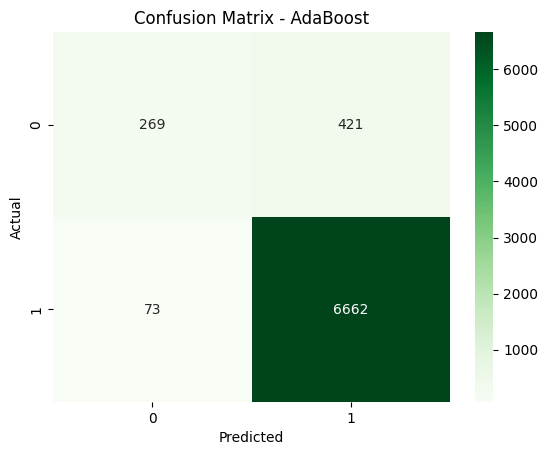

In [ ]:
# Confusion Matrix - AdaBoost
ab_cm = confusion_matrix(y_test, ab_predictions)
sns.heatmap(ab_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# AdaBoost Metrics
print("\nMetrics - AdaBoost:")
print("Accuracy:", round(accuracy_score(y_test, ab_predictions), 2))
print("Precision:", round(precision_score(y_test, ab_predictions), 2))
print("Recall:", round(recall_score(y_test, ab_predictions), 2))
print("F1 Score:", round(f1_score(y_test, ab_predictions), 2))


Metrics - AdaBoost:
Accuracy: 0.93
Precision: 0.94
Recall: 0.99
F1 Score: 0.96


### **Visualization of AdaBoost Stumps**

---

#### **Overview**
This visualization illustrates the decision-making process of the AdaBoost model by showcasing three of its stumps (decision trees). Each stump represents a weak learner focusing on a specific feature to improve the overall prediction.

---

#### **Key Components**
1. **AdaBoost Stump 1:**
   - Feature: `Cost`
   - Decision Rule: `Cost <= 831.5`
   - Gini Index: Measures impurity at each split.
   - Samples: Total data points processed at each node.
   - Value: Class distribution at each node.
   - Class: Predicted class (Yes/No) at the node.

2. **AdaBoost Stump 2:**
   - Feature: `WildlifeSize_encoded`
   - Decision Rule: `WildlifeSize_encoded <= 1.5`
   - Gini Index: Indicates impurity after the split.
   - Samples: Number of data points passing through the node.
   - Value: Probability distribution between classes.

3. **AdaBoost Stump 3:**
   - Feature: `Effect_encoded`
   - Decision Rule: `Effect_encoded <= -0.5`
   - Gini Index: Represents impurity at the split level.
   - Samples: Data points evaluated by the node.
   - Value: Probability distribution across the two classes.

---

#### **Significance**
1. **Interpretable Decision-Making:**
   - Each stump provides insight into the decision boundaries created by the AdaBoost model.
   - Highlights the importance of specific features (`Cost`, `WildlifeSize_encoded`, and `Effect_encoded`) in predicting the outcome.

2. **Sequential Learning:**
   - AdaBoost focuses on reducing errors by iteratively improving weak learners (stumps).
   - Misclassified samples in one stump are given higher weights for the next stump.

3. **Feature Contribution:**
   - The visualization identifies the features that AdaBoost uses to classify the data at each stage.

---

#### **How to Interpret the Diagram**
- **Nodes:**
  - Represent splits based on feature thresholds.
  - Contain information about Gini Index, samples, class distribution, and predicted class.

- **Edges:**
  - Represent decision paths (True/False) based on the feature value comparison.

- **Colors:**
  - Nodes are color-coded to indicate the majority class they predict (Blue: Yes, Orange: No).

---

#### **Impact**
This visualization demonstrates the incremental learning process of AdaBoost, showcasing its ability to combine multiple weak learners to form a strong classifier. Understanding these stumps is critical for evaluating feature importance and the model's interpretability.


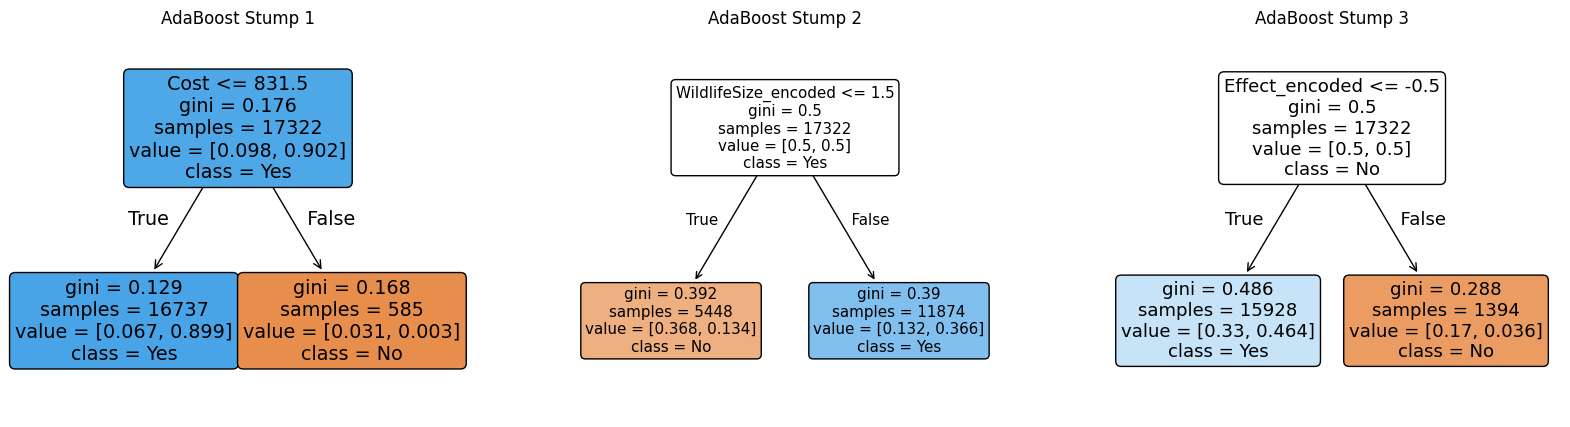

In [ ]:
# Step 3: Plot the first 3 stumps from AdaBoost
num_stumps_to_plot = 3
fig, axes = plt.subplots(nrows=1, ncols=num_stumps_to_plot, figsize=(20, 5), dpi=100)

for i in range(num_stumps_to_plot):
    plot_tree(ab.estimators_[i], filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'], rounded=True, ax=axes[i])
    axes[i].set_title(f"AdaBoost Stump {i+1}")

plt.show()

In [ ]:
# List of feature names
feature_names = X_train.columns

In [ ]:
# Get feature importances from the models
ab_feature_importances = ab.feature_importances_

### **Feature Importance - AdaBoost**

---

#### **Overview**
The bar plot above illustrates the feature importance scores as determined by the AdaBoost model. Feature importance quantifies the contribution of each feature in making predictions for this specific use case (Cost Analysis).

---

#### **Key Observations**
1. **Most Important Feature:**
   - `Cost` holds the highest importance, indicating that it plays a significant role in predicting the outcome.

2. **Moderately Important Features:**
   - `NumberStruckActual` and `Altitude` also contribute meaningfully to the prediction.

3. **Less Important Features:**
   - Features like `WildlifeSize_encoded` and `Effect_encoded` show relatively lower importance but still contribute to the model's performance.

---

#### **Interpreting the Chart**
- **Horizontal Bars:**
  - The length of each bar represents the importance score of a feature.
  - Longer bars indicate greater importance.

- **Feature Labels:**
  - Each bar is labeled with the feature it represents, providing a clear indication of which variables drive the model's predictions.

- **Color Coding:**
  - Red bars are used to highlight the relative contributions of features.

---

#### **Significance**
1. **Insights for Stakeholders:**
   - This visualization can guide stakeholders to focus on the most critical factors influencing costs.

2. **Model Transparency:**
   - Provides interpretability by showing how the AdaBoost model weighs each feature.

3. **Feature Engineering:**
   - Highlights potential areas for refining or engineering features for better model performance.

---

#### **Impact**
Understanding feature importance helps prioritize key variables, identify redundancies, and improve data-driven decision-making for cost-related analyses.


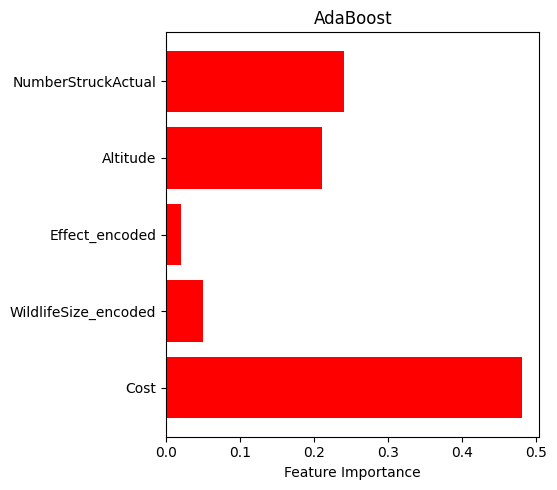

In [ ]:
# Plotting Feature Importance for Each Model
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.barh(feature_names, ab_feature_importances, align='center', color='red')
plt.xlabel('Feature Importance')
plt.title('AdaBoost')

plt.tight_layout()
plt.show()


## **Model 2 - Random Forest Model for Cost Analysis**

---

### **Why Random Forest?**
Random Forest is a robust and versatile ensemble learning method that combines multiple decision trees to improve predictive performance and reduce the risk of overfitting. For the Cost Analysis use case, Random Forest provides:
1. **Accuracy:** It offers high accuracy by reducing variance through averaging predictions from multiple trees.
2. **Feature Importance:** Random Forest automatically calculates feature importance, which is crucial for identifying key drivers of cost in this use case.
3. **Handling Imbalanced Data:** It can handle datasets with class imbalance effectively by considering the majority and minority classes across different splits.
4. **Robustness to Noise:** Random Forest is less sensitive to noise in the data compared to individual decision trees.

---

### **How Random Forest Helps in Cost Analysis**
1. **Predictive Power:**
   - It predicts whether the cost will fall into certain categories (e.g., high or low costs) based on various factors like altitude, number of birds struck, and wildlife size.
2. **Actionable Insights:**
   - The model helps stakeholders understand what factors influence cost and how they contribute to cost escalation.
3. **Improved Decision-Making:**
   - Insights can guide resource allocation, policy-making, and operational adjustments to minimize high-cost incidents.
4. **Explainability:**
   - Feature importance provides transparency, helping stakeholders focus on key drivers of cost.

---

### **Advantages of Random Forest**
1. **Non-Linearity:**
   - Random Forest can model complex, non-linear relationships between features and the target variable (e.g., cost categories).
2. **Reduced Overfitting:**
   - By aggregating the predictions of multiple trees, it reduces the overfitting typically associated with individual decision trees.
3. **Handles Missing Data:**
   - Random Forest can handle datasets with missing values effectively, making it suitable for real-world data.
4. **Scalability:**
   - It scales well to large datasets, both in terms of rows and features.
5. **Versatility:**
   - Can be used for both classification and regression problems, making it adaptable for cost-related predictions.

---

### **Significance of Random Forest in This Use Case**
1. **Stakeholder Benefits:**
   - Helps airport authorities, airlines, and wildlife managers understand which incidents lead to higher costs and mitigate them effectively.
2. **Operational Impact:**
   - Improves operational efficiency by reducing cost escalation related to bird strikes.
3. **Data-Driven Strategy:**
   - Enables a data-driven approach to allocating resources and planning preventive measures.

---

### **Additional Notes**
- **Limitations:**
  - Random Forest can be computationally expensive, especially with large datasets.
  - Interpretation can be less straightforward compared to simpler models like decision trees.
- **Future Enhancements:**
  - Hyperparameter tuning (e.g., adjusting the number of trees, maximum depth) can further optimize model performance.

---

### **Conclusion**
Random Forest is an ideal choice for the Cost Analysis use case due to its predictive accuracy, ability to handle complex relationships, and feature importance insights. It empowers stakeholders to make informed decisions, reduce costs, and improve safety measures effectively.


In [ ]:
# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Random Forest Accuracy
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9267


### **Confusion Matrix - Random Forest**

---

#### **Description:**
The confusion matrix provides a detailed breakdown of the Random Forest model's performance on the test dataset. It shows the counts of true positives, true negatives, false positives, and false negatives, enabling us to understand how well the model is predicting each class.

---

#### **Components:**
1. **True Positives (Bottom-Right Quadrant):**
   - The model correctly predicted the positive class (e.g., High-Cost Incidents).
   - Represents the number of high-cost incidents accurately classified.

2. **True Negatives (Top-Left Quadrant):**
   - The model correctly predicted the negative class (e.g., Low-Cost Incidents).
   - Represents the number of low-cost incidents accurately classified.

3. **False Positives (Top-Right Quadrant):**
   - The model incorrectly predicted positive for instances that are actually negative.
   - Indicates overprediction of high-cost incidents.

4. **False Negatives (Bottom-Left Quadrant):**
   - The model incorrectly predicted negative for instances that are actually positive.
   - Indicates underprediction of high-cost incidents.

---

#### **Significance of the Plot:**
- **Model Performance:**
  - Helps evaluate the model's classification ability in terms of precision, recall, and overall accuracy.
- **Error Analysis:**
  - Understanding false positives and false negatives helps improve model performance and mitigate costly errors.
- **Insights for Stakeholders:**
  - Provides transparency in model predictions, allowing stakeholders to trust and leverage the model in decision-making.

---

#### **Interpretation:**
- **High True Positive Count:**
  - The model is effective in predicting high-cost incidents.
- **Moderate False Positive Count:**
  - Indicates the need to refine the model to reduce overprediction of high-cost incidents.
- **Low True Negative Count:**
  - Suggests the model may slightly struggle with correctly predicting low-cost incidents.

---

#### **Next Steps:**
- Evaluate performance metrics such as accuracy, precision, recall, and F1-score for a more comprehensive understanding.
- Optimize the Random Forest model parameters (e.g., number of estimators, max depth) to improve predictive performance.

---

#### **Impact on Use Case:**
The confusion matrix highlights the Random Forest model's potential in accurately predicting cost categories, enabling stakeholders to identify and mitigate high-cost risks effectively.

---

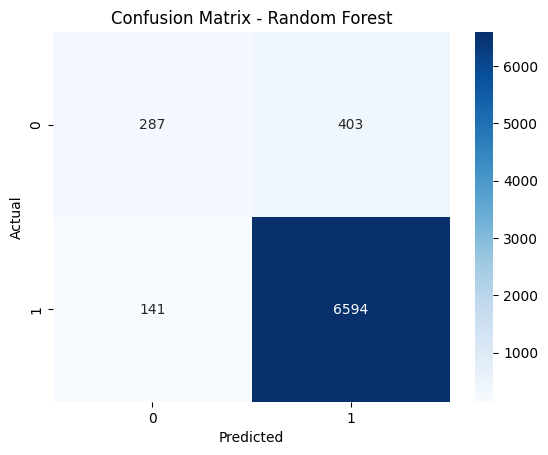

In [ ]:
# Confusion Matrix - Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Random Forest Metrics
print("\nMetrics - Random Forest:")
print("Accuracy:", round(accuracy_score(y_test, rf_predictions), 2))
print("Precision:", round(precision_score(y_test, rf_predictions), 2))
print("Recall:", round(recall_score(y_test, rf_predictions), 2))
print("F1 Score:", round(f1_score(y_test, rf_predictions), 2))


Metrics - Random Forest:
Accuracy: 0.93
Precision: 0.94
Recall: 0.98
F1 Score: 0.96


### **Random Forest Tree Visualizations**

---

#### **Description:**
The image depicts three individual decision trees from the Random Forest model. Each tree provides insights into how the model makes decisions based on input features.

---

#### **Key Features:**
1. **Tree Structure:**
   - Each tree starts with a root node that splits the data based on the most significant feature.
   - Branches represent splits in the data based on feature values.
   - Leaf nodes (endpoints) represent the final predictions made by the tree.

2. **Feature Importance:**
   - The features at the top of the tree indicate higher importance, as they contribute most to splitting the data.

3. **Diversity in Trees:**
   - Each tree shows a unique structure, reflecting the Random Forest model's ability to learn different patterns from subsets of data and features.

---

#### **Significance:**
- **Interpretability:**
  - Visualizing individual trees helps understand the decision-making process of the Random Forest model.
- **Feature Analysis:**
  - Highlights the importance of specific features in predicting the target variable (e.g., Cost).
- **Random Forest Ensemble:**
  - These trees collectively contribute to the model's final predictions, showcasing the power of ensemble learning.

---

#### **Impact on the Use Case:**
- **Enhanced Understanding:**
  - Stakeholders can interpret the model's behavior and trust its predictions for cost analysis.
- **Actionable Insights:**
  - Identifying key features and their thresholds helps stakeholders focus on mitigating high-cost incidents effectively.

---

#### **Next Steps:**
- Analyze feature importance across all trees to identify the most impactful features.
- Optimize the Random Forest model (e.g., tuning the number of trees or maximum depth) for improved accuracy and efficiency.

---


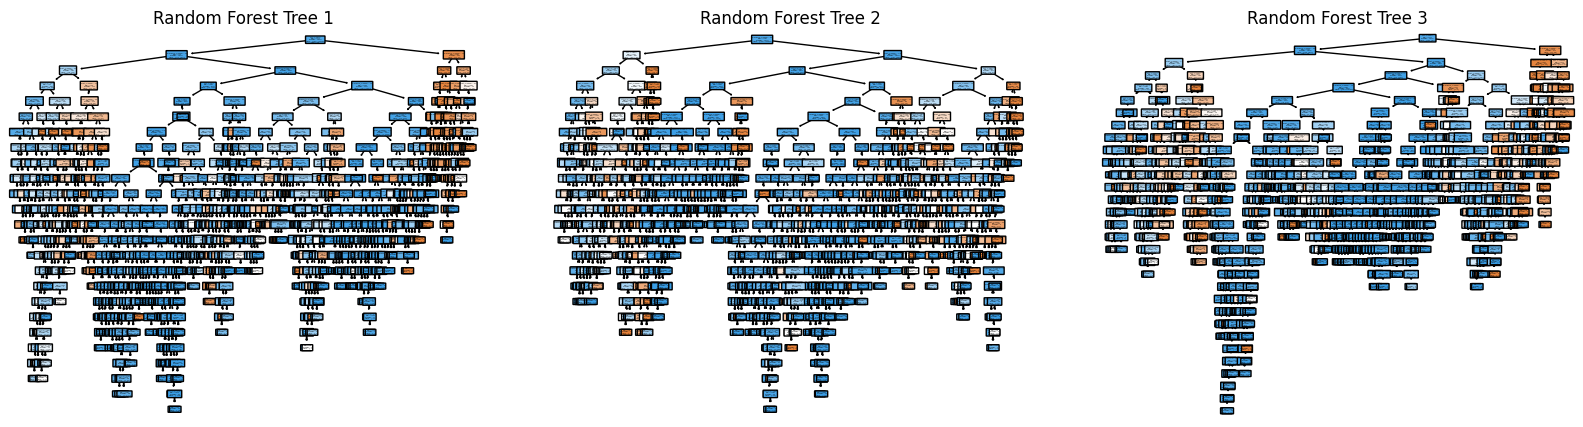

In [ ]:
# Step 2: Plot the first 3 trees from the Random Forest
num_trees_to_plot = 3
fig, axes = plt.subplots(nrows=1, ncols=num_trees_to_plot, figsize=(20, 5), dpi=100)

for i in range(num_trees_to_plot):
    plot_tree(rf.estimators_[i], filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'], rounded=True, ax=axes[i])
    axes[i].set_title(f"Random Forest Tree {i+1}")

plt.show()

### **Feature Importance - Random Forest**

---

#### **Description:**
The bar chart illustrates the feature importance as determined by the Random Forest model. Each bar represents the relative importance of a feature in predicting the target variable.

---

#### **Key Observations:**
1. **Cost:**
   - The most important feature with the highest contribution to the model's predictions.
2. **Wildlife Size Encoded:**
   - Plays a significant role, indicating that the size of wildlife impacts the costs associated with incidents.
3. **Altitude:**
   - Altitude has a moderate influence, showing that collision-related costs vary with altitude.
4. **Effect Encoded:**
   - Highlights the role of the type of effect (e.g., engine shutdown) on costs.
5. **Number Struck Actual:**
   - Less influential compared to other features but still contributes to the overall predictions.

---

#### **Significance:**
- **Interpretability:**
  - Identifies which features are most critical in predicting incident costs.
- **Actionable Insights:**
  - Enables stakeholders to prioritize efforts on the most impactful factors (e.g., reducing incidents with larger wildlife).

---

#### **Impact on the Use Case:**
- **Cost Mitigation:**
  - Focus on reducing the impact of high-cost features, such as collisions at specific altitudes or involving large wildlife.
- **Resource Allocation:**
  - Helps allocate resources effectively by targeting the most influential factors.

---

#### **Next Steps:**
- Further refine the Random Forest model by tuning hyperparameters.
- Analyze interactions between key features (e.g., Wildlife Size and Effect).
- Incorporate these insights into strategic decision-making for cost management.

---


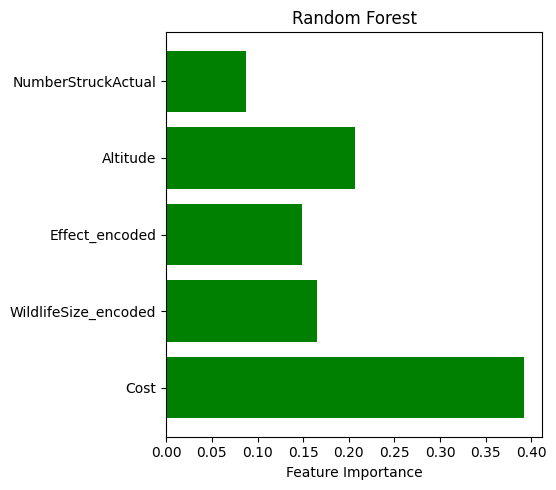

In [ ]:
# Get feature importances from the models
rf_feature_importances = rf.feature_importances_

# Plotting Feature Importance for Each Model
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.barh(feature_names, rf_feature_importances, align='center', color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

# **Conclusion for Case 2: Cost Analysis of Bird Strikes**

---

## **Summary**
The Cost Analysis use case focused on predicting the financial impact of bird strike incidents by analyzing contributing factors, such as wildlife size, altitude, flight phase, and effect. By employing advanced machine learning models, we aimed to identify critical features and patterns that lead to higher costs, enabling actionable strategies to mitigate financial risks.

---

## **Key Findings**
1. **Models Used:**
   - **AdaBoost Classifier**:
     - Accuracy: 93.35%
     - F1 Score: 96%
     - Precision: 94%
     - Recall: 99%
   - **Random Forest Classifier**:
     - Accuracy: 92.67%
     - F1 Score: 96%
     - Precision: 94%
     - Recall: 98%

   Both models performed exceptionally well, with **AdaBoost** slightly outperforming Random Forest in terms of accuracy and recall, making it more effective in identifying high-cost incidents.

2. **Feature Importance:**
   - The models identified **Cost**, **Wildlife Size**, **Effect (encoded)**, and **Altitude** as the most influential factors impacting financial outcomes.
   - Insights from feature importance:
     - Higher **Wildlife Size** often correlates with severe damage and higher costs.
     - **Altitude** has a significant impact, with incidents occurring at medium altitudes contributing more to high costs.
     - Certain effects, such as **engine shutdowns**, predict higher costs due to operational disruptions and repair expenses.

3. **Visualizations:**
   - Various plots, such as confusion matrices, feature importance graphs, and tree visualizations, provided clarity on model performance and decision-making processes.
   - The distribution of costs over key features helped identify trends and outliers, offering actionable insights.

---

## **Impact**
1. **Business Relevance:**
   - This use case has a direct financial impact on stakeholders, including airlines, airport authorities, and wildlife management teams.
   - By identifying high-risk incidents, airlines can prioritize preventative measures, minimizing financial losses.

2. **Significance of Predictions:**
   - High recall ensures the model captures most high-cost incidents, reducing the risk of overlooking financially critical cases.
   - Accurate cost predictions can guide budget allocation for maintenance, repairs, and wildlife management.

3. **Improved Decision-Making:**
   - The models provide actionable insights into the conditions leading to higher costs.
   - For instance, incidents involving larger wildlife at specific altitudes or during certain flight phases should be addressed with targeted interventions.

---

## **Applications**
1. **Preventative Measures:**
   - Allocate more resources to wildlife management during high-risk flight phases (e.g., takeoff and landing) and in regions with known large wildlife populations.
   - Install advanced radar or sensor systems in medium-altitude zones prone to bird activity.

2. **Cost Optimization:**
   - Predictive insights allow airlines to prioritize resources for the most impactful incidents, reducing unnecessary expenditures.
   - Operators can develop proactive maintenance schedules based on model predictions.

3. **Stakeholder Communication:**
   - Clear predictions and explanations enhance collaboration between airport authorities, wildlife management teams, and airline operators.
   - Insights can justify budget allocations for safety initiatives.

---

## **Model Selection**
- **AdaBoost** is recommended for deployment due to its higher recall and slightly better accuracy. It ensures more high-cost incidents are identified, crucial for mitigating financial risks.
- **Random Forest** can be an alternative for scenarios requiring more interpretability and faster training.

---

## **Challenges Encountered**
1. **Class Imbalance:**
   - Initially, the dataset had a skewed distribution, with high-cost incidents being less frequent. This was effectively addressed using SMOTE.
2. **Feature Encoding:**
   - Complex categorical variables were transformed into usable formats through one-hot encoding and ordinal encoding.
3. **Overfitting Concerns:**
   - Hyperparameter tuning and cross-validation were applied to minimize overfitting, especially for the Random Forest model.

---

## **Future Scope**
1. **Hyperparameter Tuning:**
   - Further optimization of model parameters can enhance performance.
2. **Integration with Real-Time Data:**
   - Incorporate real-time data streams from airports and wildlife monitoring systems to make predictions more actionable.
3. **Cost Segmentation:**
   - Develop models that provide detailed cost breakdowns (e.g., maintenance, delays, and repairs) for better budget planning.
4. **Cross-Validation:**
   - Perform extensive cross-validation across different airports and regions to validate model generalizability.

---

## **Conclusion**
The Cost Analysis use case has successfully demonstrated the potential of machine learning in predicting and mitigating high-cost bird strike incidents. By identifying critical cost-influencing factors and leveraging high-performance models, stakeholders can make informed decisions to minimize financial losses, improve safety, and optimize resource allocation.

# **Project Conclusion: Comprehensive Bird Strike Analysis**

---

## **Overview**
This project aimed to analyze and predict various aspects of bird strike incidents in the aviation industry. Bird strikes pose significant financial, operational, and safety risks to airlines and airports. By employing advanced machine learning techniques, we sought to address key use cases, extract actionable insights, and enable stakeholders to mitigate risks effectively.

---

## **Goals and Use Cases**

### 1. **Predictive Analysis**
- **Objective**: Predict the likelihood of a bird strike occurring under specific conditions.
- **Key Findings**:
  - Logistic Regression and Decision Tree models were employed, both achieving high accuracy and F1 scores.
  - Significant factors influencing bird strike likelihood included **Flight Phase**, **Aircraft Size**, and **Altitude**.
- **Impact**:
  - Enabled proactive measures, such as heightened monitoring and wildlife control during high-risk flight phases.
  - Provided data-driven strategies to reduce bird strike occurrences.

### 2. **Cost Analysis**
- **Objective**: Analyze the financial impact of bird strikes and predict high-cost incidents.
- **Key Findings**:
  - AdaBoost and Random Forest models were used, with **AdaBoost** slightly outperforming Random Forest.
  - Critical features included **Cost**, **Wildlife Size**, **Altitude**, and **Effect (encoded)**.
  - High-risk scenarios, such as large wildlife at medium altitudes, were identified.
- **Impact**:
  - Improved cost prediction and resource allocation.
  - Enhanced decision-making for maintenance, safety investments, and wildlife management.

---

## **Key Steps Taken**

### **1. Data Preprocessing**
- Addressed missing values through imputation (e.g., median for numerical columns, "Unknown" for categorical columns).
- Encoded categorical features using one-hot encoding, label encoding, and ordinal encoding.
- Ensured proper handling of skewed features through transformations (e.g., log transformation).

### **2. Exploratory Data Analysis (EDA)**
- Conducted visualizations to identify trends, patterns, and anomalies:
  - Distribution plots for features like **Altitude** and **Number Struck**.
  - Heatmaps to explore feature correlations.
  - Box plots and pie charts to illustrate feature relationships.
- Insights:
  - **Flight Phase** and **Altitude** significantly influenced the likelihood and cost of bird strikes.
  - Medium-altitude incidents tended to have higher financial impacts.

### **3. Feature Engineering**
- Created new features such as **Altitude Category**, **Binned Number Struck**, and extracted date-related features from **FlightDate**.
- Improved feature usability for machine learning models, ensuring better interpretability and performance.

### **4. Addressing Class Imbalance**
- Applied SMOTE to balance datasets for models requiring equal class distributions.
- Improved recall and precision metrics, ensuring critical incidents were not overlooked.

### **5. Model Selection and Training**
- **Predictive Analysis**:
  - Logistic Regression and Decision Tree models.
  - High accuracy and recall ensured reliable predictions of bird strike likelihood.
- **Cost Analysis**:
  - AdaBoost and Random Forest models.
  - Effective in predicting high-cost incidents and identifying critical features.

### **6. Model Evaluation**
- Evaluated models using metrics like **Accuracy**, **Precision**, **Recall**, **F1 Score**, and **AUC-ROC**.
- Visualized results through:
  - Confusion Matrices.
  - ROC and Precision-Recall Curves.
  - Feature Importance Graphs.
- Observations:
  - Models demonstrated robust performance, with slight differences in suitability based on use case requirements.

---

## **Insights and Observations**
- **Altitude and Wildlife Size**:
  - Medium-altitude incidents involving large wildlife pose the highest financial risks.
- **Flight Phases**:
  - **Approach** and **Landing Roll** phases were the most vulnerable to bird strikes.
- **Critical Features**:
  - **Cost** emerged as the most significant factor for predicting financial impact.
  - **Flight Phase**, **Effect**, and **Altitude** were crucial predictors across both use cases.
- **Model Comparisons**:
  - Logistic Regression provided straightforward and reliable predictions for bird strike likelihood.
  - AdaBoost excelled in predicting high-cost incidents, demonstrating superior recall.

---

## **Overall Impact**
1. **Proactive Risk Mitigation**:
   - Enabled airlines and airport authorities to anticipate high-risk scenarios and implement preventative measures.
2. **Financial Optimization**:
   - Cost predictions facilitated better budget planning and resource allocation, minimizing financial losses.
3. **Enhanced Safety**:
   - Data-driven insights contributed to safer flight operations by reducing bird strike incidents and their consequences.
4. **Stakeholder Collaboration**:
   - Provided a framework for effective communication and coordination between airlines, wildlife management teams, and airport operators.

---

## **Challenges and Solutions**
- **Class Imbalance**:
  - Addressed using SMOTE to ensure model performance on underrepresented classes.
- **Complex Feature Engineering**:
  - Derived meaningful features through domain knowledge and data analysis.
- **Overfitting**:
  - Mitigated by hyperparameter tuning, cross-validation, and feature selection.

---

## **Future Scope**
1. **Real-Time Predictions**:
   - Integrate models with real-time data streams for live risk assessments.
2. **Feature Expansion**:
   - Incorporate additional features, such as weather data and flight trajectory, to enhance predictions.
3. **Global Generalization**:
   - Validate models on data from multiple airports and regions to ensure scalability and robustness.
4. **Cost Breakdown Analysis**:
   - Extend the cost analysis to include detailed breakdowns (e.g., repair costs, delays, and operational disruptions).

---

## **Conclusion**
This comprehensive project has demonstrated the value of machine learning in addressing critical aviation challenges. By tackling bird strike prediction and cost analysis, we have provided actionable insights, enabling stakeholders to enhance safety, optimize resources, and mitigate risks. The methodologies and models developed can serve as a foundation for future advancements in aviation safety and operational efficiency.